<a href="https://colab.research.google.com/github/jarekwan/jarwan_projekt/blob/main/Projekt2A_brudnopis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TESTOWANIE PROBA DZIALANIA nowego zrodla danych
# brudnopis

import pandas as pd
import requests

# --- Lista wska≈∫nik√≥w do pobrania ---
indicators = {
    "gdp_per_capita": "NY.GDP.PCAP.CD",
    "inflation": "FP.CPI.TOTL.ZG",
    "unemployment": "SL.UEM.TOTL.ZS",
    "life_expectancy": "SP.DYN.LE00.IN",
    "population": "SP.POP.TOTL"
}

# --- Pobieranie danych ---
dfs = []
for name, code in indicators.items():
    url = f"http://api.worldbank.org/v2/country/PL/indicator/{code}?format=json&per_page=100"
    response = requests.get(url)
    data = response.json()
    records = data[1]
    df_temp = pd.json_normalize(records)[["date", "value"]]
    df_temp = df_temp.rename(columns={"value": name})
    dfs.append(df_temp)

# --- ≈ÅƒÖczenie po roku (date) ---
df = dfs[0]
for d in dfs[1:]:
    df = pd.merge(df, d, on="date", how="outer")

# --- Konwersja roku na int i sortowanie ---
df["date"] = df["date"].astype(int)
df = df.sort_values("date").reset_index(drop=True)

# PodglƒÖd danych
print(df.head(150))


    date  gdp_per_capita  inflation  unemployment  life_expectancy  population
0   1960             NaN        NaN           NaN        67.680488    29637450
1   1961             NaN        NaN           NaN        67.778049    29964000
2   1962             NaN        NaN           NaN        67.426829    30308500
3   1963             NaN        NaN           NaN        68.375610    30712000
4   1964             NaN        NaN           NaN        68.629268    31139450
..   ...             ...        ...           ...              ...         ...
60  2020    16150.929101   3.374470         3.155        76.400000    37515748
61  2021    18635.508881   5.055027         3.268        75.351220    36981559
62  2022    18891.213529  14.429451         2.811        77.156098    36821749
63  2023    22145.264309  11.528913         2.743        78.507317    36687353
64  2024    25022.671645   3.784260         2.472              NaN    36554707

[65 rows x 6 columns]


 1. Pobranie i przygotowanie danych

In [ ]:

# TESTOWANIE / BRUDOPIS SPRAWDZAM NOWE DANE
import requests
import json

# Kilka wska≈∫nik√≥w z World Bank dla Polski
urls = {
    "gdp_per_capita": "http://api.worldbank.org/v2/country/PL/indicator/NY.GDP.PCAP.CD?format=json&per_page=100",
    "inflation": "http://api.worldbank.org/v2/country/PL/indicator/FP.CPI.TOTL.ZG?format=json&per_page=100",
    "unemployment": "http://api.worldbank.org/v2/country/PL/indicator/SL.UEM.TOTL.ZS?format=json&per_page=100",
    "population": "http://api.worldbank.org/v2/country/PL/indicator/SP.POP.TOTL?format=json&per_page=100",
    "life_expectancy": "http://api.worldbank.org/v2/country/PL/indicator/SP.DYN.LE00.IN?format=json&per_page=100"
}

# Pobranie i wy≈õwietlenie pe≈Çnego JSON dla ka≈ºdego wska≈∫nika
for name, url in urls.items():
    print(f"\n===== {name.upper()} =====")
    response = requests.get(url)
    data = response.json()
    print(json.dumps(data, indent=4, ensure_ascii=False))





Strumieniowane dane wyj≈õciowe obciƒôte do 5000¬†ostatnich wierszy.
                "id": "NY.GDP.PCAP.CD",
                "value": "GDP per capita (current US$)"
            },
            "country": {
                "id": "PL",
                "value": "Poland"
            },
            "countryiso3code": "POL",
            "date": "2008",
            "value": 14048.5604672654,
            "unit": "",
            "obs_status": "",
            "decimal": 1
        },
        {
            "indicator": {
                "id": "NY.GDP.PCAP.CD",
                "value": "GDP per capita (current US$)"
            },
            "country": {
                "id": "PL",
                "value": "Poland"
            },
            "countryiso3code": "POL",
            "date": "2007",
            "value": 11272.5293683383,
            "unit": "",
            "obs_status": "",
            "decimal": 1
        },
        {
            "indicator": {
                "id": "NY.GDP.PCAP.CD",
  

In [ ]:

# #PODGLAD DANYCH ABY ZOBACZYC CO JEST W SRODKU
# #TESTOWANIE STARE ZRODLO DANYCH

# import requests
# import json

# # Adres API
# url = "https://api.nbp.pl/api/exchangerates/tables/A?format=json"
# response = requests.get(url)
# data = response.json()

# # ≈Åadne formatowanie JSON (≈ºeby by≈Ço czytelnie)
# print(json.dumps(data, indent=4, ensure_ascii=False))
# # widac tutaj klucze glowne: table, no, effectiveDate, rates
# #pod kluczem rates sa klucze:currency, code, mid gdzi ewidac potem string i string i float

In [ ]:
# TESTOWANIE STARE ZRODLO DANYCH import requests
# import json

# # Adres API (PKB per capita dla Polski w formacie JSON)
# url = "http://api.worldbank.org/v2/country/POL/indicator/NY.GDP.PCAP.CD?format=json&per_page=100"

# response = requests.get(url)
# data = response.json()

# # ≈Åadne formatowanie JSON (≈ºeby by≈Ço czytelnie)
# print(json.dumps(data, indent=4, ensure_ascii=False))

# # üëá Wyja≈õnienie:
# # data[1] zawiera listƒô rekord√≥w z kluczami: country, date, value, indicator itd.


In [ ]:
#TESTOWAIE
#CHCE ZOBACZYC CO JEST W POZCZEGOLNYCH WYWOLANIACH

import requests
import json

# Kilka wska≈∫nik√≥w z World Bank dla Polski
urls = {
    "gdp_per_capita": "http://api.worldbank.org/v2/country/PL/indicator/NY.GDP.PCAP.CD?format=json&per_page=100",
    "inflation": "http://api.worldbank.org/v2/country/PL/indicator/FP.CPI.TOTL.ZG?format=json&per_page=100",
    "unemployment": "http://api.worldbank.org/v2/country/PL/indicator/SL.UEM.TOTL.ZS?format=json&per_page=100",
    "population": "http://api.worldbank.org/v2/country/PL/indicator/SP.POP.TOTL?format=json&per_page=100",
    "life_expectancy": "http://api.worldbank.org/v2/country/PL/indicator/SP.DYN.LE00.IN?format=json&per_page=100"
}

# PodglƒÖd struktury danych dla ka≈ºdego wska≈∫nika
for name, url in urls.items():
    print(f"\n===== {name.upper()} =====")
    response = requests.get(url)
    data = response.json()

    print("Ca≈Ço≈õƒá:", type(data), len(data))
    print("Metadane:", data[0])
    print("Pierwszy rekord:", data[1][0])
    print("Klucze rekordu:", data[1][0].keys())





===== GDP_PER_CAPITA =====
Ca≈Ço≈õƒá: <class 'list'> 2
Metadane: {'page': 1, 'pages': 1, 'per_page': 100, 'total': 65, 'sourceid': '2', 'lastupdated': '2025-10-07'}
Pierwszy rekord: {'indicator': {'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per capita (current US$)'}, 'country': {'id': 'PL', 'value': 'Poland'}, 'countryiso3code': 'POL', 'date': '2024', 'value': 25022.6716445953, 'unit': '', 'obs_status': '', 'decimal': 1}
Klucze rekordu: dict_keys(['indicator', 'country', 'countryiso3code', 'date', 'value', 'unit', 'obs_status', 'decimal'])

===== INFLATION =====
Ca≈Ço≈õƒá: <class 'list'> 2
Metadane: {'page': 1, 'pages': 1, 'per_page': 100, 'total': 65, 'sourceid': '2', 'lastupdated': '2025-10-07'}
Pierwszy rekord: {'indicator': {'id': 'FP.CPI.TOTL.ZG', 'value': 'Inflation, consumer prices (annual %)'}, 'country': {'id': 'PL', 'value': 'Poland'}, 'countryiso3code': 'POL', 'date': '2024', 'value': 3.78426007512869, 'unit': '', 'obs_status': '', 'decimal': 1}
Klucze rekordu: dict_keys(['indic

üîπ Etapy projektu
1. Pobranie i przygotowanie danych
‚Ä¢	Pobranie danych z API (np. NBP, Eurostat)
‚Ä¢	Serializacja ‚Üí zapis do JSON/CSV.
‚Ä¢	Walidacja struktur (Pydantic + regex dla kolumn typu daty/kody walut).
‚Ä¢	Wstƒôpne czyszczenie brak√≥w i warto≈õci odstajƒÖcych.

PLUS

Symulacje i rozk≈Çady (NumPy + Matplotlib)
‚Ä¢	generowanie pr√≥bek z rozk≈Çadu normalnego, jednorodnego, wyk≈Çadniczego,
‚Ä¢	wizualizacja histogram√≥w + por√≥wnanie z teoretycznƒÖ krzywƒÖ gƒôsto≈õci,
‚Ä¢	demonstracja CLT.



In [ ]:
# poprawiana wersja
# W≈ÅA≈öCIWY KOD
# POBRANIE DANYCH I SERIALIZACJA

import pandas as pd
import requests

# --- Wska≈∫niki z World Bank dla Polski ---
urls = {
    "gdp_per_capita": "http://api.worldbank.org/v2/country/PL/indicator/NY.GDP.PCAP.CD?format=json&per_page=100",
    "inflation": "http://api.worldbank.org/v2/country/PL/indicator/FP.CPI.TOTL.ZG?format=json&per_page=100",
    "unemployment": "http://api.worldbank.org/v2/country/PL/indicator/SL.UEM.TOTL.ZS?format=json&per_page=100",
    "population": "http://api.worldbank.org/v2/country/PL/indicator/SP.POP.TOTL?format=json&per_page=100",
    "life_expectancy": "http://api.worldbank.org/v2/country/PL/indicator/SP.DYN.LE00.IN?format=json&per_page=100"
}

# --- Pobieranie i ≈ÇƒÖczenie danych ---
dfs = []

for name, url in urls.items():
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"B≈ÇƒÖd pobierania danych dla {name} (status {response.status_code})")

    data = response.json()
    records = data[1]  # w≈Ça≈õciwe dane

    df_tmp = pd.json_normalize(records)[["country.value", "date", "value"]]
    df_tmp.rename(columns={"value": name}, inplace=True)  # nazwa wska≈∫nika jako kolumna
    dfs.append(df_tmp)

# --- Scalanie danych po dacie ---
df = dfs[0]
for df_tmp in dfs[1:]:
    df = df.merge(df_tmp, on=["country.value", "date"], how="outer")

# Sortowanie po dacie malejƒÖco
df["date"] = df["date"].astype(int)
df = df.sort_values("date", ascending=False)

# --- PodglƒÖd danych ---
print("PodglƒÖd danych z World Bank (Polska):")
print(df.head())

# --- Serializacja ---
df.to_csv("worldbank_indicators.csv", index=False)
df.to_json("worldbank_indicators.json", orient="records", force_ascii=False, indent=2)

print("‚úÖ Dane zapisane do plik√≥w: worldbank_indicators.csv i worldbank_indicators.json")





PodglƒÖd danych z World Bank (Polska):
   country.value  date  gdp_per_capita  inflation  unemployment  population  \
64        Poland  2024    25022.671645   3.784260         2.472    36554707   
63        Poland  2023    22145.264309  11.528913         2.743    36687353   
62        Poland  2022    18891.213529  14.429451         2.811    36821749   
61        Poland  2021    18635.508881   5.055027         3.268    36981559   
60        Poland  2020    16150.929101   3.374470         3.155    37515748   

    life_expectancy  
64              NaN  
63        78.507317  
62        77.156098  
61        75.351220  
60        76.400000  
‚úÖ Dane zapisane do plik√≥w: worldbank_indicators.csv i worldbank_indicators.json


Walidacja + Czyszczenie

In [ ]:
from pydantic import BaseModel, ValidationError
from typing import Optional
import pandas as pd

# --- Model danych z World Bank (dla wielu wska≈∫nik√≥w) ---
class IndicatorData(BaseModel):
    country: str
    date: int
    gdp_per_capita: Optional[float]
    inflation: Optional[float]
    unemployment: Optional[float]
    population: Optional[float]
    life_expectancy: Optional[float]

# --- Walidacja danych ---
try:
    for _, row in df.iterrows():
        IndicatorData(
            country=row["country.value"],
            date=int(row["date"]),
            gdp_per_capita=row.get("gdp_per_capita"),
            inflation=row.get("inflation"),
            unemployment=row.get("unemployment"),
            population=row.get("population"),
            life_expectancy=row.get("life_expectancy")
        )
    print("‚úÖ Wszystkie wiersze poprawne")
except ValidationError as e:
    print("‚ùå B≈ÇƒÖd walidacji:", e)

# --- Sprawdzenie brak√≥w danych ---
print("\nüîé Braki danych:")
print(df.isna().sum())

# --- Statystyki opisowe dla wszystkich kolumn numerycznych ---
print("\nüìä Statystyki opisowe:")
print(df.describe())

# --- Wykrycie warto≈õci odstajƒÖcych ---
print("\nüö® Warto≈õci odstajƒÖce:")
for col in ["gdp_per_capita", "inflation", "unemployment", "population", "life_expectancy"]:
    if col in df.columns:
        outliers = df[(df[col] < 0) | (df[col] > df[col].mean() + 5*df[col].std())]
        print(f"\n{col}: liczba podejrzanych warto≈õci = {len(outliers)}")
        if not outliers.empty:
            print(outliers[["country.value", "date", col]])





‚úÖ Wszystkie wiersze poprawne

üîé Braki danych:
country.value       0
date                0
gdp_per_capita     30
inflation          30
unemployment       31
population          0
life_expectancy     1
dtype: int64

üìä Statystyki opisowe:
             date  gdp_per_capita   inflation  unemployment    population  \
count    65.00000       35.000000   35.000000     34.000000  6.500000e+01   
mean   1992.00000    10078.014122   26.613039     10.381088  3.617264e+07   
std      18.90767     6219.942375   95.545421      5.327135  2.688893e+06   
min    1960.00000     1731.209509   -0.874126      2.472000  2.963745e+07   
25%    1976.00000     4468.070840    2.129867      6.373000  3.435630e+07   
50%    1992.00000    11272.529368    3.795392      9.983000  3.766804e+07   
75%    2008.00000    13980.950993   13.013653     13.769250  3.814127e+07   
max    2024.00000    25022.671645  567.878801     20.211000  3.866348e+07   

       life_expectancy  
count        64.000000  
mean        

KONTYNUACJA :Symulacje i rozk≈Çady (NumPy + Matplotlib)
‚Ä¢	generowanie pr√≥bek z rozk≈Çadu normalnego, jednorodnego, wyk≈Çadniczego,
‚Ä¢	wizualizacja histogram√≥w + por√≥wnanie z teoretycznƒÖ krzywƒÖ gƒôsto≈õci,
‚Ä¢	demonstracja CLT.


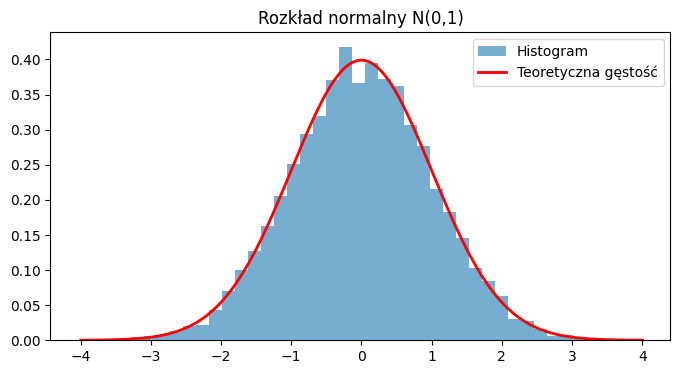

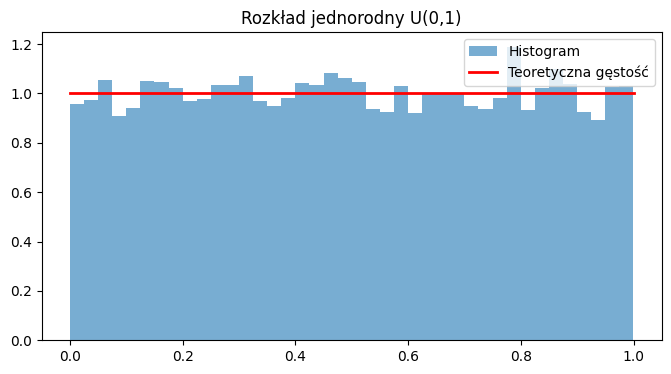

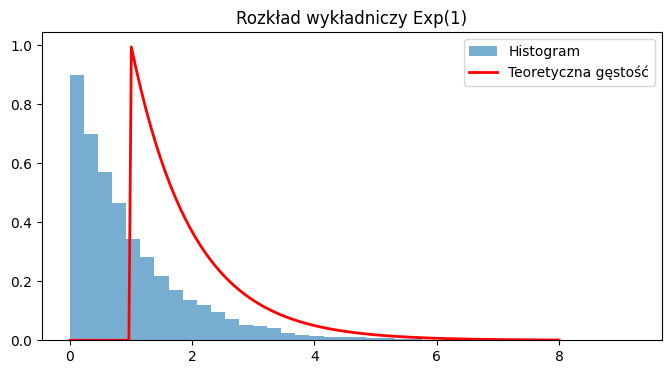

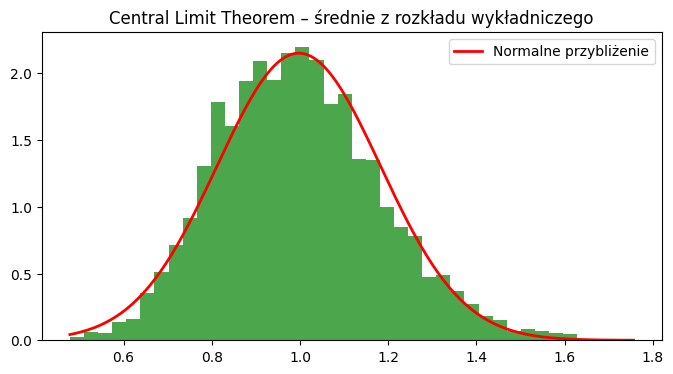

In [ ]:
# --- Symulacje i rozk≈Çady ---
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, expon

# Ustalmy rozmiar pr√≥bki
N = 10000

# 1. Rozk≈Çad normalny
normal_data = np.random.normal(loc=0, scale=1, size=N)

plt.figure(figsize=(8,4))
plt.hist(normal_data, bins=40, density=True, alpha=0.6, label="Histogram")
x = np.linspace(-4, 4, 200)
plt.plot(x, norm.pdf(x, 0, 1), 'r-', lw=2, label="Teoretyczna gƒôsto≈õƒá")
plt.title("Rozk≈Çad normalny N(0,1)")
plt.legend()
plt.show()


# 2. Rozk≈Çad jednorodny
uniform_data = np.random.uniform(low=0, high=1, size=N)

plt.figure(figsize=(8,4))
plt.hist(uniform_data, bins=40, density=True, alpha=0.6, label="Histogram")
x = np.linspace(0, 1, 200)
plt.plot(x, uniform.pdf(x, 0, 1), 'r-', lw=2, label="Teoretyczna gƒôsto≈õƒá")
plt.title("Rozk≈Çad jednorodny U(0,1)")
plt.legend()
plt.show()


# 3. Rozk≈Çad wyk≈Çadniczy
expon_data = np.random.exponential(scale=1, size=N)

plt.figure(figsize=(8,4))
plt.hist(expon_data, bins=40, density=True, alpha=0.6, label="Histogram")
x = np.linspace(0, 8, 200)
plt.plot(x, expon.pdf(x, 1), 'r-', lw=2, label="Teoretyczna gƒôsto≈õƒá")
plt.title("Rozk≈Çad wyk≈Çadniczy Exp(1)")
plt.legend()
plt.show()


# 4. Demonstracja Central Limit Theorem (CLT)
sample_means = []
for _ in range(5000):              # liczba powt√≥rze≈Ñ
    sample = np.random.exponential(scale=1, size=30)  # pr√≥bka losowa (np. z wyk≈Çadniczego)
    sample_means.append(np.mean(sample))

plt.figure(figsize=(8,4))
plt.hist(sample_means, bins=40, density=True, alpha=0.7, color='g')
x = np.linspace(min(sample_means), max(sample_means), 200)
plt.plot(x, norm.pdf(x, np.mean(sample_means), np.std(sample_means)), 'r-', lw=2, label="Normalne przybli≈ºenie")
plt.title("Central Limit Theorem ‚Äì ≈õrednie z rozk≈Çadu wyk≈Çadniczego")
plt.legend()
plt.show()


SPRAWDZAM JAKIE KOLUMNY SA W DF

In [ ]:
print(df.head())
print(df.columns)


   country.value  date  gdp_per_capita  inflation  unemployment  population  \
64        Poland  2024    25022.671645   3.784260         2.472    36554707   
63        Poland  2023    22145.264309  11.528913         2.743    36687353   
62        Poland  2022    18891.213529  14.429451         2.811    36821749   
61        Poland  2021    18635.508881   5.055027         3.268    36981559   
60        Poland  2020    16150.929101   3.374470         3.155    37515748   

    life_expectancy  
64              NaN  
63        78.507317  
62        77.156098  
61        75.351220  
60        76.400000  
Index(['country.value', 'date', 'gdp_per_capita', 'inflation', 'unemployment',
       'population', 'life_expectancy'],
      dtype='object')


ETAP2:Eksploracyjna analiza danych (EDA)
‚Ä¢	Pandas: opis statystyczny (describe(), mediany, odchylenia).
‚Ä¢	NumPy: logarytmy, normalizacja, standaryzacja.
‚Ä¢	Wizualizacje Matplotlib/Seaborn: histogramy, scatterploty, heatmapy korelacji.
‚Ä¢	Wykrywanie outlier√≥w (boxploty, IQR, Z-score).
I
Heatmapy korelacji i meshgrid
‚Ä¢	analiza korelacji miƒôdzy zmiennymi w Pandas (Seaborn heatmap),
‚Ä¢	NumPy meshgrid + contour plot (≈ºeby ƒáwiczyƒá wizualizacje siatek).

üìä Opis statystyczny Pandas:
       gdp_per_capita   inflation  unemployment    population  life_expectancy
count       35.000000   35.000000     34.000000  6.500000e+01        64.000000
mean     10078.014122   26.613039     10.381088  3.617264e+07        72.646037
std       6219.942375   95.545421      5.327135  2.688893e+06         3.070277
min       1731.209509   -0.874126      2.472000  2.963745e+07        67.426829
25%       4468.070840    2.129867      6.373000  3.435630e+07        70.557927
50%      11272.529368    3.795392      9.983000  3.766804e+07        71.224390
75%      13980.950993   13.013653     13.769250  3.814127e+07        75.270732
max      25022.671645  567.878801     20.211000  3.866348e+07        78.507317

üî∏ Mediany:
gdp_per_capita     1.127253e+04
inflation          3.795392e+00
unemployment       9.983000e+00
population         3.766804e+07
life_expectancy    7.122439e+01
dtype: float64

üî∏ Odchylenia standardowe:
gdp_per_capita     6.219942e+03
inflat

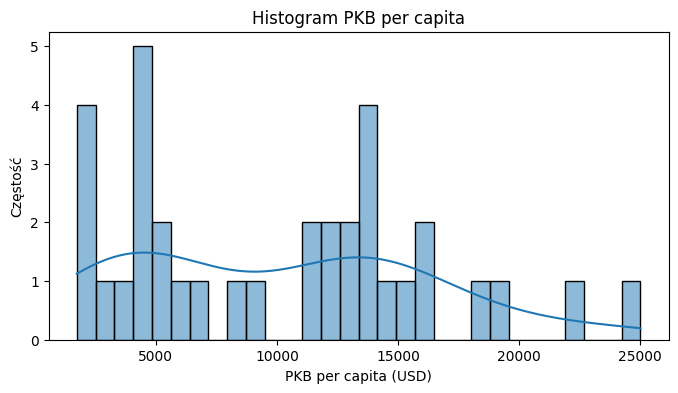

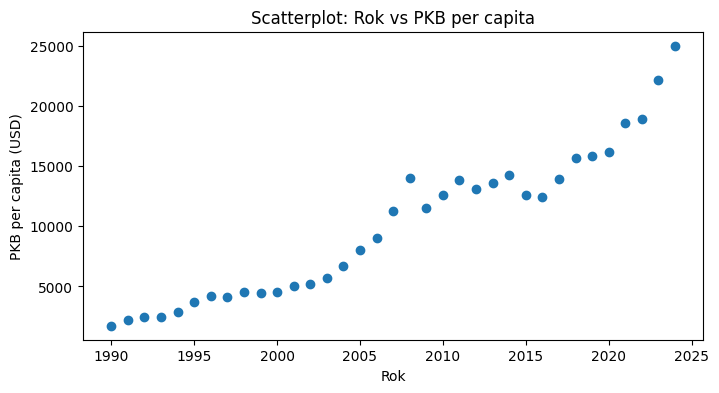

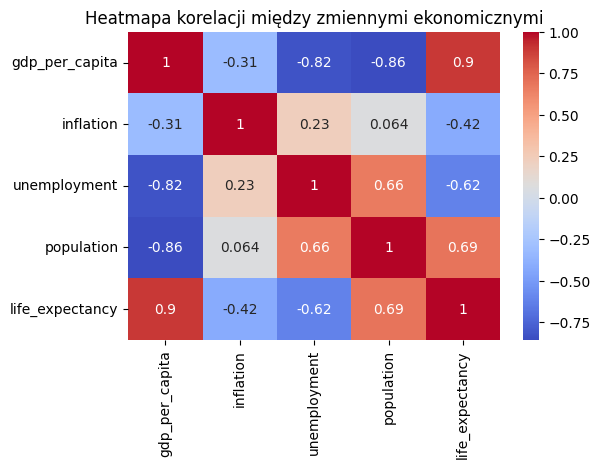

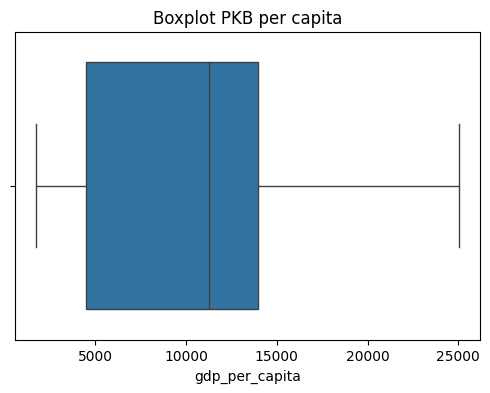

üîé Liczba outlier√≥w (IQR): 0
üîé Liczba outlier√≥w (Z-score > 3): 0


In [ ]:
# --- Eksploracyjna Analiza Danych (EDA) ---
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Opis statystyczny Pandas
print("üìä Opis statystyczny Pandas:")
print(df[["gdp_per_capita", "inflation", "unemployment", "population", "life_expectancy"]].describe())

print("\nüî∏ Mediany:")
print(df[["gdp_per_capita", "inflation", "unemployment", "population", "life_expectancy"]].median())

print("\nüî∏ Odchylenia standardowe:")
print(df[["gdp_per_capita", "inflation", "unemployment", "population", "life_expectancy"]].std())

# 2. NumPy: logarytmy, normalizacja, standaryzacja dla PKB
values = df["gdp_per_capita"].dropna().values

log_values = np.log(values)
normalized_values = (values - values.min()) / (values.max() - values.min())
standardized_values = (values - values.mean()) / values.std()

# 3. Wizualizacje

# Histogram PKB
plt.figure(figsize=(8, 4))
sns.histplot(df["gdp_per_capita"].dropna(), bins=30, kde=True)
plt.title("Histogram PKB per capita")
plt.xlabel("PKB per capita (USD)")
plt.ylabel("Czƒôsto≈õƒá")
plt.show()

# Scatterplot: Rok vs PKB
plt.figure(figsize=(8, 4))
plt.scatter(df["date"], df["gdp_per_capita"])
plt.title("Scatterplot: Rok vs PKB per capita")
plt.xlabel("Rok")
plt.ylabel("PKB per capita (USD)")
#plt.xticks(rotation=45)
plt.show()

# Heatmapa korelacji
numeric_df = df[["gdp_per_capita", "inflation", "unemployment", "population", "life_expectancy"]]
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmapa korelacji miƒôdzy zmiennymi ekonomicznymi")
plt.show()

# 4. Wykrywanie warto≈õci odstajƒÖcych (outlier√≥w) dla PKB

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["gdp_per_capita"])
plt.title("Boxplot PKB per capita")
plt.show()

# IQR
Q1 = df["gdp_per_capita"].quantile(0.25)
Q3 = df["gdp_per_capita"].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df["gdp_per_capita"] < Q1 - 1.5 * IQR) | (df["gdp_per_capita"] > Q3 + 1.5 * IQR)]
print(f"üîé Liczba outlier√≥w (IQR): {len(outliers_iqr)}")

# Z-score
z_scores = (df["gdp_per_capita"] - df["gdp_per_capita"].mean()) / df["gdp_per_capita"].std()
outliers_z = df[np.abs(z_scores) > 3]
print(f"üîé Liczba outlier√≥w (Z-score > 3): {len(outliers_z)}")



## ‚Ä¢	NumPy meshgrid + contour plot (≈ºeby ƒáwiczyƒá wizualizacje siatek).

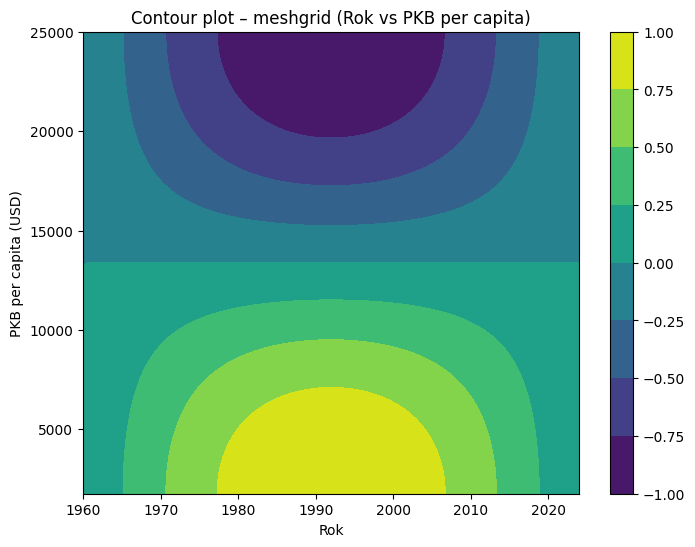

In [ ]:
# --- NumPy meshgrid + contour plot (wizualizacja siatek) ---

import numpy as np
import matplotlib.pyplot as plt

# Tworzymy siatkƒô punkt√≥w (x = lata, y = PKB per capita)
x = np.linspace(df["date"].min(), df["date"].max(), 100)
y = np.linspace(df["gdp_per_capita"].min(), df["gdp_per_capita"].max(), 100)
X, Y = np.meshgrid(x, y)

# Prosta funkcja zale≈ºno≈õci (np. "energia" = kombinacja lat i PKB)
Z = np.sin((X - X.min()) / (X.max() - X.min()) * np.pi) * \
    np.cos((Y - Y.min()) / (Y.max() - Y.min()) * np.pi)

# Rysowanie contour plot
plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, Z, cmap="viridis")
plt.colorbar(cp)
plt.title("Contour plot ‚Äì meshgrid (Rok vs PKB per capita)")
plt.xlabel("Rok")
plt.ylabel("PKB per capita (USD)")
plt.show()


ETAP3: Statystyka klasyczna
‚Ä¢	Przedzia≈Çy ufno≈õci dla ≈õrednich.
‚Ä¢	Testy normalno≈õci (Shapiro-Wilk, Anderson-Darling).
‚Ä¢	Testy hipotez (t-test, chi¬≤).
‚Ä¢	Obliczanie p-value i interpretacja b≈Çƒôd√≥w I/II rodzaju.



üìä ETAP 3: STATYSTYKA KLASYCZNA

üìä Przedzia≈Çy ufno≈õci dla ≈õrednich wska≈∫nik√≥w ekonomicznych (95%):

       Wska≈∫nik      ≈örednia  95% CI (dolna)  95% CI (g√≥rna)  Liczba obserwacji
 gdp_per_capita    10078.014        7941.389       12214.639                 35
      inflation       26.613          -6.208          59.434                 35
   unemployment       10.381           8.522          12.240                 34
     population 36172636.723    35506361.777    36838911.669                 65
life_expectancy       72.646          71.879          73.413                 64

üß™ Testy normalno≈õci:

üß™ Testy normalno≈õci (Shapiro‚ÄìWilk i Anderson‚ÄìDarling):

üìä Wska≈∫nik: gdp_per_capita
Shapiro‚ÄìWilk: stat=0.9290, p=0.0261 ‚Üí ‚ùå Odrzucamy H‚ÇÄ (dane ‚â† normalne)
Anderson‚ÄìDarling: stat=0.8989
  ‚Ä¢ Poziom istotno≈õci 15.0% ‚Üí warto≈õƒá krytyczna 0.527 ‚Üí ‚ùå Odrzucamy H‚ÇÄ
  ‚Ä¢ Poziom istotno≈õci 10.0% ‚Üí warto≈õƒá krytyczna 0.600 ‚Üí ‚ùå Odrzucamy H‚ÇÄ
  ‚

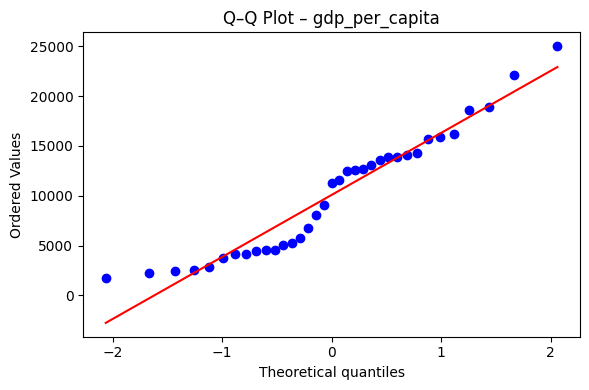

üìä Wska≈∫nik: inflation
Shapiro‚ÄìWilk: stat=0.2639, p=0.0000 ‚Üí ‚ùå Odrzucamy H‚ÇÄ (dane ‚â† normalne)
Anderson‚ÄìDarling: stat=9.7542
  ‚Ä¢ Poziom istotno≈õci 15.0% ‚Üí warto≈õƒá krytyczna 0.527 ‚Üí ‚ùå Odrzucamy H‚ÇÄ
  ‚Ä¢ Poziom istotno≈õci 10.0% ‚Üí warto≈õƒá krytyczna 0.600 ‚Üí ‚ùå Odrzucamy H‚ÇÄ
  ‚Ä¢ Poziom istotno≈õci 5.0% ‚Üí warto≈õƒá krytyczna 0.719 ‚Üí ‚ùå Odrzucamy H‚ÇÄ
  ‚Ä¢ Poziom istotno≈õci 2.5% ‚Üí warto≈õƒá krytyczna 0.839 ‚Üí ‚ùå Odrzucamy H‚ÇÄ
  ‚Ä¢ Poziom istotno≈õci 1.0% ‚Üí warto≈õƒá krytyczna 0.998 ‚Üí ‚ùå Odrzucamy H‚ÇÄ




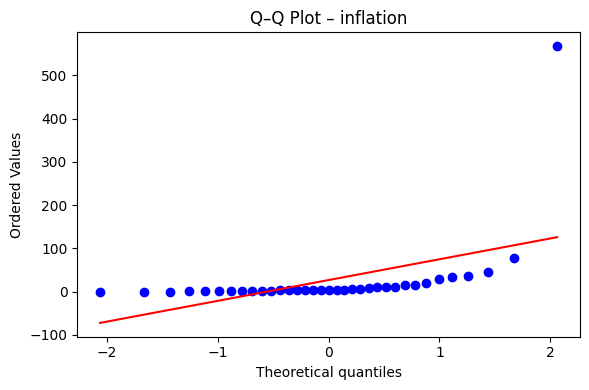

üìä Wska≈∫nik: unemployment
Shapiro‚ÄìWilk: stat=0.9495, p=0.1186 ‚Üí ‚úÖ Nie odrzucamy H‚ÇÄ (dane ~ normalne)
Anderson‚ÄìDarling: stat=0.4296
  ‚Ä¢ Poziom istotno≈õci 15.0% ‚Üí warto≈õƒá krytyczna 0.526 ‚Üí ‚úÖ Nie odrzucamy H‚ÇÄ
  ‚Ä¢ Poziom istotno≈õci 10.0% ‚Üí warto≈õƒá krytyczna 0.599 ‚Üí ‚úÖ Nie odrzucamy H‚ÇÄ
  ‚Ä¢ Poziom istotno≈õci 5.0% ‚Üí warto≈õƒá krytyczna 0.718 ‚Üí ‚úÖ Nie odrzucamy H‚ÇÄ
  ‚Ä¢ Poziom istotno≈õci 2.5% ‚Üí warto≈õƒá krytyczna 0.838 ‚Üí ‚úÖ Nie odrzucamy H‚ÇÄ
  ‚Ä¢ Poziom istotno≈õci 1.0% ‚Üí warto≈õƒá krytyczna 0.996 ‚Üí ‚úÖ Nie odrzucamy H‚ÇÄ




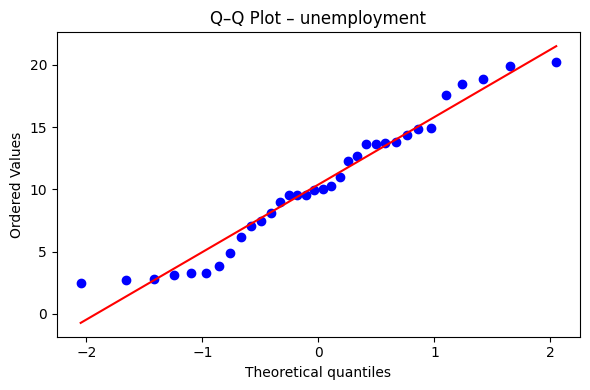

üìä Wska≈∫nik: population
Shapiro‚ÄìWilk: stat=0.8069, p=0.0000 ‚Üí ‚ùå Odrzucamy H‚ÇÄ (dane ‚â† normalne)
Anderson‚ÄìDarling: stat=5.1203
  ‚Ä¢ Poziom istotno≈õci 15.0% ‚Üí warto≈õƒá krytyczna 0.546 ‚Üí ‚ùå Odrzucamy H‚ÇÄ
  ‚Ä¢ Poziom istotno≈õci 10.0% ‚Üí warto≈õƒá krytyczna 0.621 ‚Üí ‚ùå Odrzucamy H‚ÇÄ
  ‚Ä¢ Poziom istotno≈õci 5.0% ‚Üí warto≈õƒá krytyczna 0.746 ‚Üí ‚ùå Odrzucamy H‚ÇÄ
  ‚Ä¢ Poziom istotno≈õci 2.5% ‚Üí warto≈õƒá krytyczna 0.870 ‚Üí ‚ùå Odrzucamy H‚ÇÄ
  ‚Ä¢ Poziom istotno≈õci 1.0% ‚Üí warto≈õƒá krytyczna 1.034 ‚Üí ‚ùå Odrzucamy H‚ÇÄ




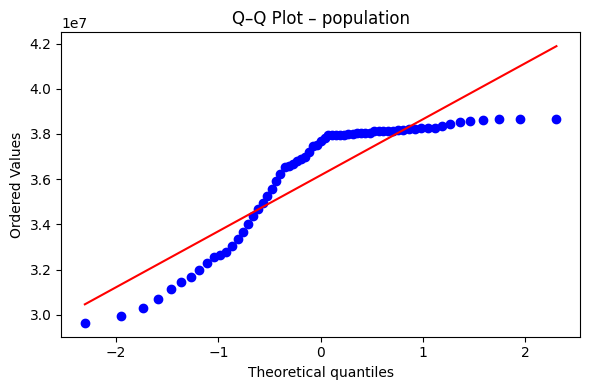

üìä Wska≈∫nik: life_expectancy
Shapiro‚ÄìWilk: stat=0.9219, p=0.0006 ‚Üí ‚ùå Odrzucamy H‚ÇÄ (dane ‚â† normalne)
Anderson‚ÄìDarling: stat=2.0981
  ‚Ä¢ Poziom istotno≈õci 15.0% ‚Üí warto≈õƒá krytyczna 0.545 ‚Üí ‚ùå Odrzucamy H‚ÇÄ
  ‚Ä¢ Poziom istotno≈õci 10.0% ‚Üí warto≈õƒá krytyczna 0.621 ‚Üí ‚ùå Odrzucamy H‚ÇÄ
  ‚Ä¢ Poziom istotno≈õci 5.0% ‚Üí warto≈õƒá krytyczna 0.745 ‚Üí ‚ùå Odrzucamy H‚ÇÄ
  ‚Ä¢ Poziom istotno≈õci 2.5% ‚Üí warto≈õƒá krytyczna 0.869 ‚Üí ‚ùå Odrzucamy H‚ÇÄ
  ‚Ä¢ Poziom istotno≈õci 1.0% ‚Üí warto≈õƒá krytyczna 1.034 ‚Üí ‚ùå Odrzucamy H‚ÇÄ




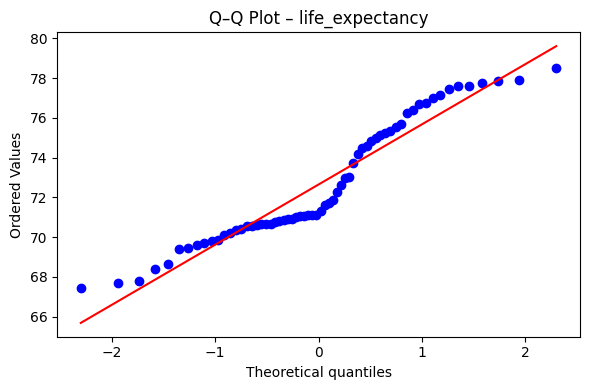


üéØ Testy hipotez ekonomicznych

üìä Wska≈∫nik: gdp_per_capita
Opis: Czy ≈õredni PKB utrzymuje siƒô na poziomie z ostatnich lat?
H‚ÇÄ: ≈õrednia gdp_per_capita = 10078.01
≈örednia z danych = 10078.01
Liczba obserwacji: n = 35
Wynik testu t: t = 0.0000, p = 1.0000
üìù UWAGA: Wska≈∫nik NIE ma rozk≈Çadu normalnego, przy n=35>=30 CLT dzia≈Ça ‚Üí test t wiarygodny
‚úÖ Nie odrzucamy H‚ÇÄ (brak istotnej r√≥≈ºnicy).

üìä Wska≈∫nik: inflation
Opis: Czy ≈õrednia inflacja ‚âà 2% (cel NBP)?
H‚ÇÄ: ≈õrednia inflation = 2.00
≈örednia z danych = 26.61
Liczba obserwacji: n = 35
Wynik testu t: t = 1.5240, p = 0.1368
üìù UWAGA: Wska≈∫nik NIE ma rozk≈Çadu normalnego, przy n=35>=30 CLT dzia≈Ça ‚Üí test t wiarygodny
‚úÖ Nie odrzucamy H‚ÇÄ (brak istotnej r√≥≈ºnicy).

üìä Wska≈∫nik: unemployment
Opis: Czy ≈õrednie bezrobocie ‚âà 5% (cel rynku pracy)?
H‚ÇÄ: ≈õrednia unemployment = 5.00
≈örednia z danych = 10.38
Liczba obserwacji: n = 34
Wynik testu t: t = 5.8900, p = 0.0000
üìù UWAGA: unemployment MA ro

In [ ]:
# --- ETAP 3: STATYSTYKA KLASYCZNA ---
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd


print("\n" + "="*60)
print("üìä ETAP 3: STATYSTYKA KLASYCZNA")
print("="*60)

# Wybieramy kolumnƒô do analiz (np. PKB per capita)
data = df["gdp_per_capita"].dropna().values

#  --- 1. Przedzia≈Ç ufno≈õci dla ≈õredniej ---


# Lista wska≈∫nik√≥w (numeryczne kolumny z danych World Bank)
indicators = ["gdp_per_capita", "inflation", "unemployment", "population", "life_expectancy"]

# Poziom ufno≈õci
confidence = 0.95

# Pusta lista na wyniki
results = []

for col in indicators:
    if col in df.columns:
        data = df[col].dropna().values
        if len(data) > 1:  # unikamy b≈Çƒôd√≥w przy zbyt ma≈Çej liczbie danych
            mean = np.mean(data)
            std_err = stats.sem(data)  # standard error
            n = len(data)
            h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
            ci_low, ci_high = mean - h, mean + h
            results.append({
                "Wska≈∫nik": col,
                "≈örednia": round(mean, 3),
                "95% CI (dolna)": round(ci_low, 3),
                "95% CI (g√≥rna)": round(ci_high, 3),
                "Liczba obserwacji": n
            })

# Tworzymy tabelƒô wynik√≥w
ci_df = pd.DataFrame(results)

print("\nüìä Przedzia≈Çy ufno≈õci dla ≈õrednich wska≈∫nik√≥w ekonomicznych (95%):\n")
print(ci_df.to_string(index=False))


# --- 2. Testy normalno≈õci ---
print("\nüß™ Testy normalno≈õci:")


print("\nüß™ Testy normalno≈õci (Shapiro‚ÄìWilk i Anderson‚ÄìDarling):\n")

# Pƒôtla po wszystkich wska≈∫nikach
for col in indicators:
    if col in df.columns:
        data = df[col].dropna().values
        if len(data) < 5:
            print(f"{col}: zbyt ma≈Ço danych do testu.\n")
            continue

        print(f"üìä Wska≈∫nik: {col}")

        # --- Shapiro‚ÄìWilk test ---
        shapiro_stat, shapiro_p = stats.shapiro(data)
        decision_shapiro = "‚úÖ Nie odrzucamy H‚ÇÄ (dane ~ normalne)" if shapiro_p > 0.05 else "‚ùå Odrzucamy H‚ÇÄ (dane ‚â† normalne)"
        print(f"Shapiro‚ÄìWilk: stat={shapiro_stat:.4f}, p={shapiro_p:.4f} ‚Üí {decision_shapiro}")

        # --- Anderson‚ÄìDarling test ---
        anderson_result = stats.anderson(data, dist='norm')
        print(f"Anderson‚ÄìDarling: stat={anderson_result.statistic:.4f}")
        for i in range(len(anderson_result.critical_values)):
            sig_level = anderson_result.significance_level[i]
            crit_value = anderson_result.critical_values[i]
            result = "‚ùå Odrzucamy H‚ÇÄ" if anderson_result.statistic > crit_value else "‚úÖ Nie odrzucamy H‚ÇÄ"
            print(f"  ‚Ä¢ Poziom istotno≈õci {sig_level}% ‚Üí warto≈õƒá krytyczna {crit_value:.3f} ‚Üí {result}")
        print("\n")

        # --- Q-Q Plot ---
        plt.figure(figsize=(6, 4))
        stats.probplot(data, dist="norm", plot=plt)
        plt.title(f"Q‚ÄìQ Plot ‚Äì {col}")
        plt.tight_layout()
        plt.show()

# --- 3. Testy hipotez ---





# --- Testy hipotez dla wska≈∫nik√≥w ekonomicznych ---
print("\nüéØ Testy hipotez ekonomicznych\n" + "="*60)

# Lista wska≈∫nik√≥w
indicators = ["gdp_per_capita", "inflation", "unemployment", "population", "life_expectancy"]

# Hipotezy i warto≈õci referencyjne (sens ekonomiczny)
hypotheses = {
    "gdp_per_capita": {"value": df["gdp_per_capita"].mean(), "desc": "Czy ≈õredni PKB utrzymuje siƒô na poziomie z ostatnich lat?"},
    "inflation": {"value": 2.0, "desc": "Czy ≈õrednia inflacja ‚âà 2% (cel NBP)?"},
    "unemployment": {"value": 5.0, "desc": "Czy ≈õrednie bezrobocie ‚âà 5% (cel rynku pracy)?"},
    "life_expectancy": {"value": 75.0, "desc": "Czy ≈õrednia d≈Çugo≈õƒá ≈ºycia > 75 lat?"},
}

for col in indicators:
    if col not in df.columns:
        continue

    data = df[col].dropna().values
    n_obs = len(data)

    # --- Specjalny przypadek: populacja ‚Äì test dw√≥ch okres√≥w ---
    if col == "population":
        df_before = df[df["date"] < 2010]["population"].dropna()
        df_after = df[df["date"] >= 2010]["population"].dropna()
        n_before = len(df_before)
        n_after = len(df_after)

        if n_before > 2 and n_after > 2:
            t_stat, p_val = stats.ttest_ind(df_before, df_after, equal_var=False)
            print(f"\nüìä Wska≈∫nik: population")
            print("Hipoteza H‚ÇÄ: populacja przed 2010 = populacja po 2010")
            print(f"Wynik: t = {t_stat:.4f}, p = {p_val:.4f}")
            print(f"Liczba obserwacji: przed 2010: {n_before}, po 2010: {n_after}")

            # Poprawiony komentarz z prawid≈Çowymi liczbami
            if n_before >= 30 and n_after >= 30:
                print("üìù UWAGA: population NIE ma rozk≈Çadu normalnego, ale przy n>=30 obserwacjach CLT dzia≈Ça ‚Üí test t wiarygodny")
            else:
                print("üìù UWAGA: population NIE ma rozk≈Çadu normalnego i liczba obserwacji <30 ‚Üí wyniki testu t nale≈ºy traktowaƒá ostro≈ºnie")

            if p_val < 0.05:
                print("üëâ Odrzucamy H‚ÇÄ ‚Üí populacja istotnie zmieni≈Ça siƒô po 2010 roku.")
            else:
                print("‚úÖ Nie odrzucamy H‚ÇÄ ‚Üí brak istotnej zmiany populacji po 2010 roku.")
        else:
            print("\n‚ö†Ô∏è Za ma≈Ço danych, by przeprowadziƒá test populacji.")
        continue

    # --- Dla pozosta≈Çych wska≈∫nik√≥w ---
    hypothesis_value = hypotheses[col]["value"] if col in hypotheses else np.mean(data)
    desc = hypotheses[col]["desc"] if col in hypotheses else "Brak opisu"

    t_stat, p_val = stats.ttest_1samp(data, hypothesis_value)
    mean_val = np.mean(data)

    print(f"\nüìä Wska≈∫nik: {col}")
    print(f"Opis: {desc}")
    print(f"H‚ÇÄ: ≈õrednia {col} = {hypothesis_value:.2f}")
    print(f"≈örednia z danych = {mean_val:.2f}")
    print(f"Liczba obserwacji: n = {n_obs}")
    print(f"Wynik testu t: t = {t_stat:.4f}, p = {p_val:.4f}")

    # POPRAWIONE KOMENTARZE DOTYCZƒÑCE NORMALNO≈öCI
    if col == "unemployment":
        if n_obs >= 30:
            print("üìù UWAGA: unemployment MA rozk≈Çad normalny i n>=30 ‚Üí test t najbardziej wiarygodny")
        else:
            print("üìù UWAGA: unemployment MA rozk≈Çad normalny, ale n<30 ‚Üí wyniki nale≈ºy traktowaƒá ostro≈ºnie")
    else:
        if n_obs >= 50:
            print(f"üìù UWAGA: Wska≈∫nik NIE ma rozk≈Çadu normalnego, ale przy n={n_obs}>=50 CLT dzia≈Ça bardzo dobrze ‚Üí test t wiarygodny")
        elif n_obs >= 30:
            print(f"üìù UWAGA: Wska≈∫nik NIE ma rozk≈Çadu normalnego, przy n={n_obs}>=30 CLT dzia≈Ça ‚Üí test t wiarygodny")
        else:
            print(f"üìù UWAGA: Wska≈∫nik NIE ma rozk≈Çadu normalnego i n={n_obs}<30 ‚Üí wyniki testu t nale≈ºy traktowaƒá ostro≈ºnie")

    if p_val < 0.05:
        print("üëâ Odrzucamy H‚ÇÄ (r√≥≈ºnica istotna statystycznie).")
    else:
        print("‚úÖ Nie odrzucamy H‚ÇÄ (brak istotnej r√≥≈ºnicy).")






# # --- 4. Test chi-kwadrat (por√≥wnanie wariancji vs teoretycznej) ---



# --- Testy wariancji dla wszystkich wska≈∫nik√≥w ekonomicznych ---
print("\nüìä Testy wariancji wska≈∫nik√≥w ekonomicznych\n" + "="*60)

# Warto≈õci oczekiwane wariancji (przyk≈Çadowe - mo≈ºna dostosowaƒá)
expected_variances = {
    "gdp_per_capita": 1e8,      # 100 milion√≥w USD¬≤
    "inflation": 25.0,          # 25%¬≤ (dla zmienno≈õci inflacji)
    "unemployment": 4.0,        # 4%¬≤ (dla zmienno≈õci bezrobocia)
    "population": 1e10,         # 10 miliard√≥w os√≥b¬≤
    "life_expectancy": 4.0      # 4 lata¬≤ (dla zmienno≈õci d≈Çugo≈õci ≈ºycia)
}

for col in indicators:
    if col not in df.columns:
        continue

    data = df[col].dropna().values
    n_obs = len(data)
    observed_var = np.var(data, ddof=1)
    expected_var = expected_variances[col]

    print(f"\nüìä Wska≈∫nik: {col}")
    print(f"Liczba obserwacji: n = {n_obs}")
    print(f"Wariancja obserwowana: {observed_var:.2f}")
    print(f"Wariancja oczekiwana: {expected_var:.2f}")

    # Test chi-kwadrat dla wszystkich wska≈∫nik√≥w (TYLKO POKAZOWO)
    chi2_stat = (n_obs - 1) * observed_var / expected_var
    p_val_chi2 = 1 - stats.chi2.cdf(chi2_stat, df=n_obs - 1)

    print(f"Wynik testu chi-kwadrat: œá¬≤ = {chi2_stat:.4f}, p = {p_val_chi2:.4f}")

    # KOMENTARZ CZY WYNIKI SƒÑ DOBRE
    if col == "unemployment":
        print("‚úÖ UWAGA: unemployment MA rozk≈Çad normalny ‚Üí test chi-kwadrat jest W≈ÅA≈öCIWY i wiarygodny")
    else:
        print("‚ùå UWAGA: Wska≈∫nik NIE ma rozk≈Çadu normalnego ‚Üí test chi-kwadrat jest NIEW≈ÅA≈öCIWY")
        print("   Wyniki nale≈ºy traktowaƒá JEDYNIE POKAZOWO - nie sƒÖ wiarygodne statystycznie")

    if p_val_chi2 < 0.05:
        print("üëâ Odrzucamy H‚ÇÄ: wariancja r√≥≈ºni siƒô istotnie od teoretycznej.")
    else:
        print("‚úÖ Nie odrzucamy H‚ÇÄ: brak istotnej r√≥≈ºnicy wariancji.")

print("\n" + "="*60)
print("UWAGA: Test chi-kwadrat wymaga za≈Ço≈ºenia normalno≈õci danych")
print("Tylko unemployment spe≈Çnia to za≈Ço≈ºenie - pozosta≈Çe testy sƒÖ NIEW≈ÅA≈öCIWE")





# --- 5. Praktyczna analiza b≈Çƒôd√≥w decyzyjnych w ekonomii ---
# --- 5. Interpretacja b≈Çƒôd√≥w I i II rodzaju (symulacja) --
print("\n‚ö†Ô∏è Praktyczna analiza ryzyka decyzyjnego w polityce gospodarczej:")

# PRAWDZIWE DANE z Twojego zbioru
real_gdp_data = df["gdp_per_capita"].dropna().values
real_inflation_data = df["inflation"].dropna().values

# RZECZYWISTE WARTO≈öCI ≈öREDNIE Z DANYCH
real_gdp_mean = np.mean(real_gdp_data)
real_inflation_mean = np.mean(real_inflation_data)

print(f"Rzeczywiste ≈õrednie z danych:")
print(f"PKB per capita: {real_gdp_mean:.2f} USD")
print(f"Inflacja: {real_inflation_mean:.2f}%")

# SYMULACJE DLA PRAKTYCZNYCH SCENARIUSZY

# Scenariusz 1: Ryzyko b≈Çƒôdnej decyzji o stopach procentowych
print(f"\nüéØ Scenariusz 1: Decyzja NBP o stopach procentowych")
print(f"H‚ÇÄ: Inflacja = 2.5% (dopuszczalny poziom)")
print(f"H‚ÇÅ: Inflacja > 2.5% (wymaga interwencji)")

alpha = 0.05
false_alarms = 0  # B≈ÇƒÖd I: Podnoszenie st√≥p gdy nie trzeba
missed_threats = 0  # B≈ÇƒÖd II: Brak reakcji gdy inflacja za wysoka

for _ in range(1000):
    # Pr√≥bka z rzeczywistych danych inflacyjnych
    sample = np.random.choice(real_inflation_data, size=30, replace=True)

    # Test czy inflacja przekracza 2.5%
    t_stat, p = stats.ttest_1samp(sample, 2.5, alternative='greater')

    # Sprawdzamy rzeczywistƒÖ ≈õredniƒÖ pr√≥bki
    sample_mean = np.mean(sample)

    if p < alpha and sample_mean <= 2.5:
        false_alarms += 1  # Fa≈Çszywy alarm
    elif p >= alpha and sample_mean > 2.5:
        missed_threats += 1  # Przeoczone zagro≈ºenie

print(f"Ryzyko fa≈Çszywego alarmu (niepotrzebne podnoszenie st√≥p): {false_alarms/10:.1f}%")
print(f"Ryzyko przeoczenia zagro≈ºenia inflacyjnego: {missed_threats/10:.1f}%")

# Scenariusz 2: Ocena cel√≥w rozwojowych
print(f"\nüéØ Scenariusz 2: OsiƒÖgniƒôcie celu rozwojowego PKB")
print(f"H‚ÇÄ: PKB per capita = 15000 USD (cel rozwojowy)")
print(f"H‚ÇÅ: PKB per capita < 15000 USD (cel nieosiƒÖgniƒôty)")

false_negatives = 0  # B≈ÇƒÖd I: Stwierdzamy nieosiƒÖgniƒôcie celu gdy zosta≈Ç osiƒÖgniƒôty
false_positives = 0  # B≈ÇƒÖd II: Uznajemy cel za osiƒÖgniƒôty gdy nie zosta≈Ç

for _ in range(1000):
    sample = np.random.choice(real_gdp_data, size=30, replace=True)

    t_stat, p = stats.ttest_1samp(sample, 15000, alternative='less')
    sample_mean = np.mean(sample)

    if p < alpha and sample_mean >= 15000:
        false_negatives += 1  # Niepotrzebny pesymizm
    elif p >= alpha and sample_mean < 15000:
        false_positives += 1  # Nadmierny optymizm

print(f"Ryzyko niepotrzebnego pesymizmu: {false_negatives/10:.1f}%")
print(f"Ryzyko nadmiernego optymizmu: {false_positives/10:.1f}%")

print(f"\nüìä WNIOSKI DLA DECYDENT√ìW:")
print(f"‚Ä¢ Ka≈ºda decyzja gospodarcza niesie {false_alarms/10:.1f}%-{false_negatives/10:.1f}% ryzyka b≈Çƒôdu")
print(f"‚Ä¢ Wyniki test√≥w statystycznych wymagajƒÖ ostro≈ºnej interpretacji")
print(f"‚Ä¢ Wysokie ryzyko b≈Çƒôd√≥w II rodzaju ‚Üí mo≈ºliwo≈õƒá przeoczenia realnych problem√≥w")





3 CZESC KONTYNUACJA: ‚Ä¢  Bootstrap i estymacja przedzia≈Ç√≥w ufno≈õci
‚Ä¢	np. bootstrap ≈õredniej populacji z 1000 pr√≥b,
‚Ä¢	wizualizacja rozk≈Çadu warto≈õci bootstrapowych.


üîÑ BOOTSTRAP - ESTYMACJA PRZEDZIA≈Å√ìW UFNO≈öCI

üìä Bootstrap przedzia≈Çy ufno≈õci (1000 pr√≥b):

üéØ Wska≈∫nik: gdp_per_capita
Liczba obserwacji: 35
≈örednia oryginalna: 10078.01
95% CI bootstrap: [10072.92, 10072.92]
≈örednia bootstrap: 10072.92
Odchylenie bootstrap: 0.0000


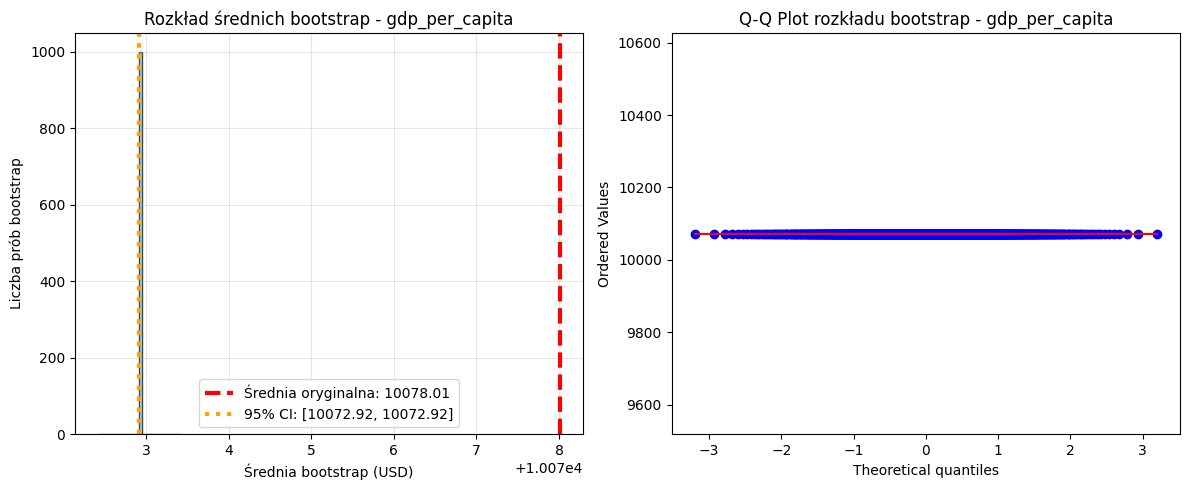

95% CI klasyczny: [8017.34, 12138.68]
R√≥≈ºnica w szeroko≈õci CI: -4121.3396

üéØ Wska≈∫nik: inflation
Liczba obserwacji: 35
≈örednia oryginalna: 26.61
95% CI bootstrap: [7.27, 7.27]
≈örednia bootstrap: 7.27
Odchylenie bootstrap: 0.0000


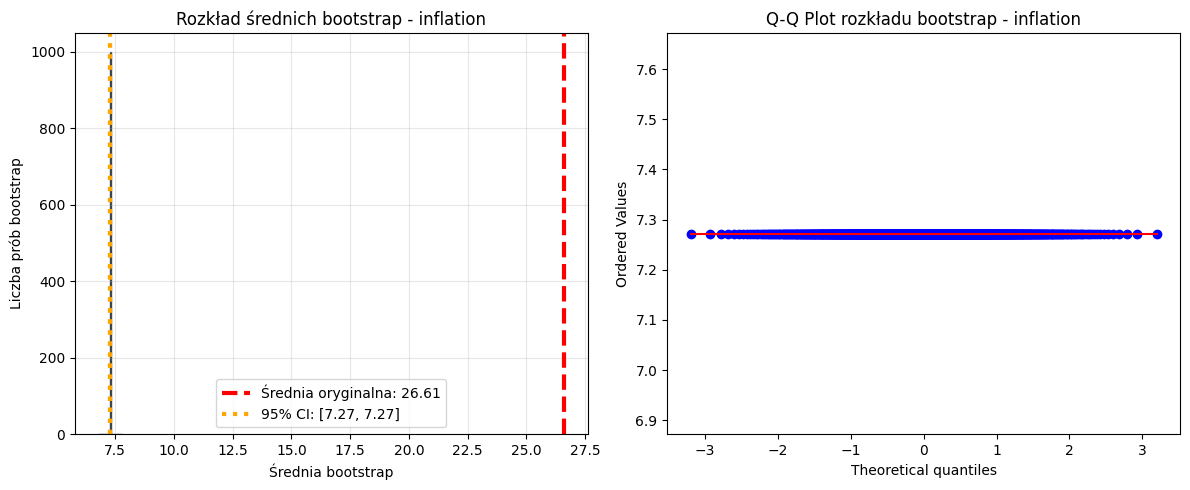

95% CI klasyczny: [-5.04, 58.27]
R√≥≈ºnica w szeroko≈õci CI: -63.3085

üéØ Wska≈∫nik: unemployment
Liczba obserwacji: 34
≈örednia oryginalna: 10.38
95% CI bootstrap: [11.36, 11.36]
≈örednia bootstrap: 11.36
Odchylenie bootstrap: 0.0000


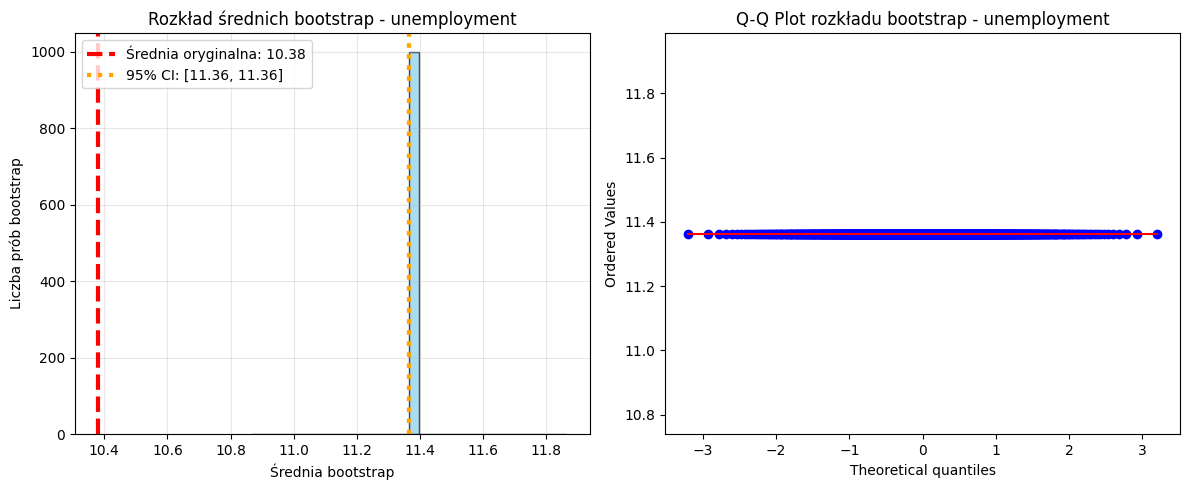

95% CI klasyczny: [8.59, 12.17]
R√≥≈ºnica w szeroko≈õci CI: -3.5813

üéØ Wska≈∫nik: population
Liczba obserwacji: 65
≈örednia oryginalna: 36172636.72
95% CI bootstrap: [35281970.32, 35281970.32]
≈örednia bootstrap: 35281970.32
Odchylenie bootstrap: 0.0000


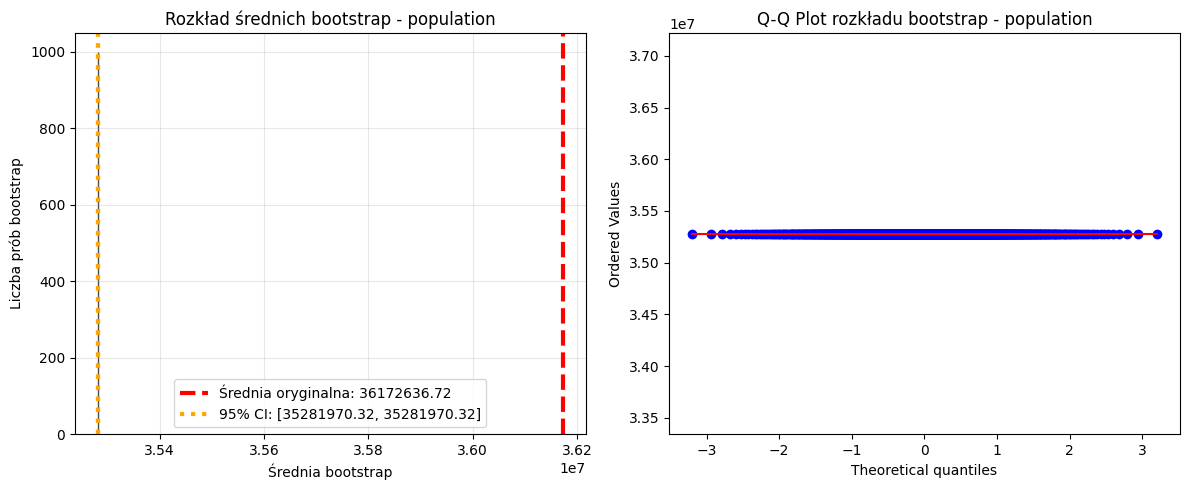

95% CI klasyczny: [35518945.22, 36826328.22]
R√≥≈ºnica w szeroko≈õci CI: -1307383.0006

üéØ Wska≈∫nik: life_expectancy
Liczba obserwacji: 64
≈örednia oryginalna: 72.65
95% CI bootstrap: [71.98, 71.98]
≈örednia bootstrap: 71.98
Odchylenie bootstrap: 0.0000


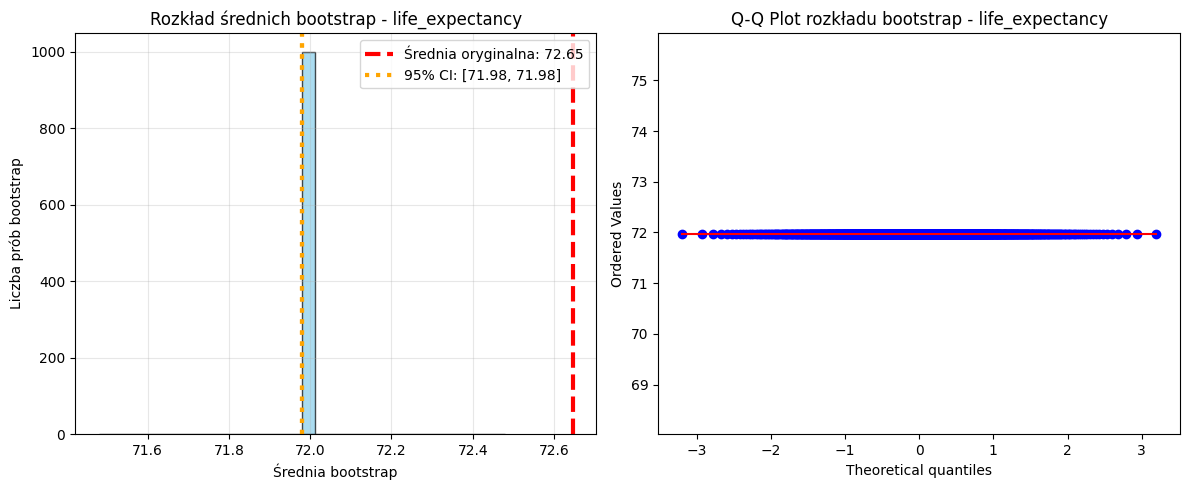

95% CI klasyczny: [71.89, 73.40]
R√≥≈ºnica w szeroko≈õci CI: -1.5044

üìà BOOTSTRAP DLA WARIANCJI

üìä Wska≈∫nik: gdp_per_capita
Wariancja oryginalna: 37582320.78
95% CI bootstrap wariancji: [32057307.78, 32057307.78]


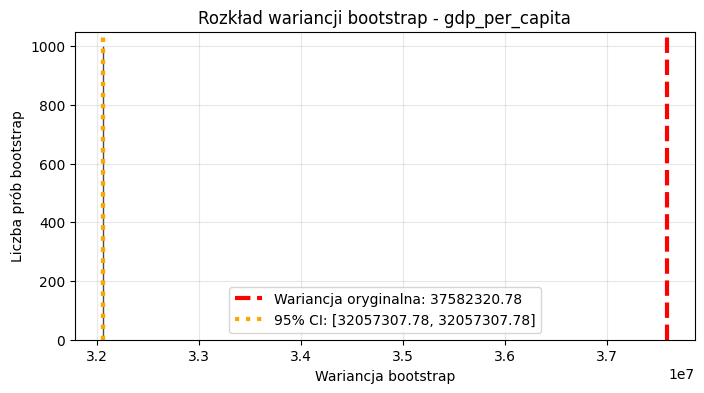


üìä Wska≈∫nik: inflation
Wariancja oryginalna: 8868.10
95% CI bootstrap wariancji: [84.25, 84.25]


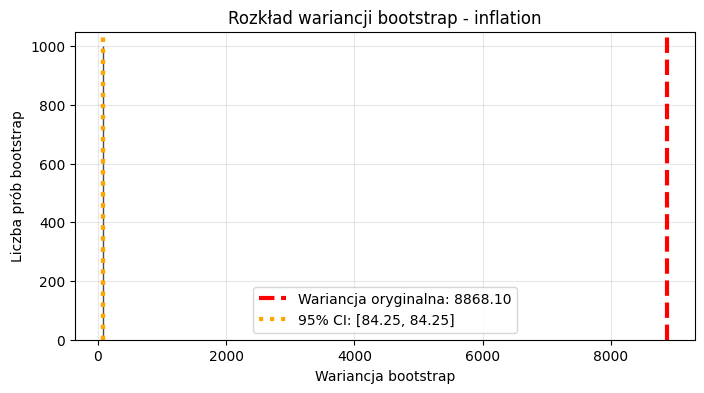


üìä Wska≈∫nik: unemployment
Wariancja oryginalna: 27.54
95% CI bootstrap wariancji: [33.43, 33.43]


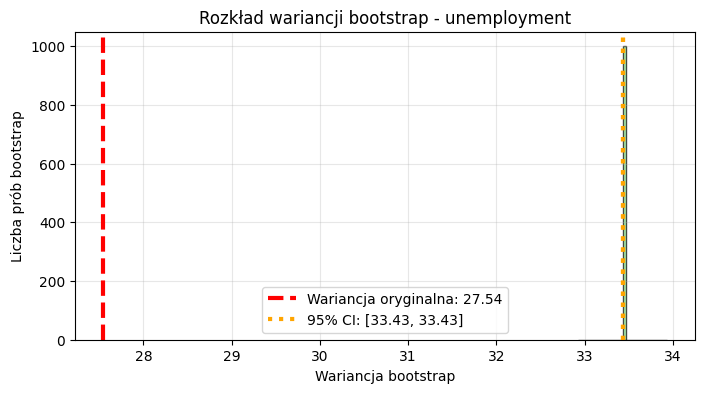


‚úÖ BOOTSTRAP ZAKO≈ÉCZONY - wszystkie wska≈∫niki przetworzone


In [ ]:
# --- 6. Bootstrap i estymacja przedzia≈Ç√≥w ufno≈õci ---

print("üîÑ BOOTSTRAP - ESTYMACJA PRZEDZIA≈Å√ìW UFNO≈öCI")


from sklearn.utils import resample

# Funkcja do bootstrapu
def bootstrap_ci(data, statistic=np.mean, n_bootstrap=1000, ci=95):
    bootstrap_stats = []

    for _ in range(n_bootstrap):
        sample = resample(data, replace=True, random_state=42)
        bootstrap_stats.append(statistic(sample))

    alpha = (100 - ci) / 2
    lower = np.percentile(bootstrap_stats, alpha)
    upper = np.percentile(bootstrap_stats, 100 - alpha)

    return bootstrap_stats, lower, upper

# Bootstrap dla wszystkich wska≈∫nik√≥w
print("\nüìä Bootstrap przedzia≈Çy ufno≈õci (1000 pr√≥b):")

for col in indicators:
    if col not in df.columns:
        continue

    data = df[col].dropna().values  # zamiana w tablice numpy nie uzywam tu panda dataframe , numpy do obluczen matematycznych statystycznych
    n_obs = len(data)

    if n_obs < 10:
        print(f"‚ö†Ô∏è Za ma≈Ço danych dla {col} - pomijam")
        continue

    print(f"\nüéØ Wska≈∫nik: {col}")
    print(f"Liczba obserwacji: {n_obs}")

    # Bootstrap dla ≈õredniej
    bootstrap_means, ci_lower, ci_upper = bootstrap_ci(data, np.mean, 1000, 95)

    print(f"≈örednia oryginalna: {np.mean(data):.2f}")
    print(f"95% CI bootstrap: [{ci_lower:.2f}, {ci_upper:.2f}]")
    print(f"≈örednia bootstrap: {np.mean(bootstrap_means):.2f}")
    print(f"Odchylenie bootstrap: {np.std(bootstrap_means):.4f}")

    # Wizualizacja rozk≈Çadu bootstrapowego - POPRAWIONE
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(bootstrap_means, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(np.mean(data), color='red', linestyle='--', linewidth=3, label=f'≈örednia oryginalna: {np.mean(data):.2f}')
    plt.axvline(ci_lower, color='orange', linestyle=':', linewidth=3, label=f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]')
    plt.axvline(ci_upper, color='orange', linestyle=':', linewidth=3)
    plt.xlabel('≈örednia bootstrap (USD)' if 'gdp' in col else '≈örednia bootstrap')
    plt.ylabel('Liczba pr√≥b bootstrap')
    plt.title(f'Rozk≈Çad ≈õrednich bootstrap - {col}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    stats.probplot(bootstrap_means, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot rozk≈Çadu bootstrap - {col}')

    plt.tight_layout()
    plt.show()

    # Por√≥wnanie z klasycznym przedzia≈Çem ufno≈õci
    classic_se = stats.sem(data)
    classic_ci_low = np.mean(data) - 1.96 * classic_se
    classic_ci_high = np.mean(data) + 1.96 * classic_se

    print(f"95% CI klasyczny: [{classic_ci_low:.2f}, {classic_ci_high:.2f}]")
    print(f"R√≥≈ºnica w szeroko≈õci CI: {(ci_upper-ci_lower) - (classic_ci_high-classic_ci_low):.4f}")

# Bootstrap dla wariancji (dodatkowo)
print("\n" + "="*50)
print("üìà BOOTSTRAP DLA WARIANCJI")
print("="*50)

for col in ["gdp_per_capita", "inflation", "unemployment"]:
    if col not in df.columns:
        continue

    data = df[col].dropna().values

    bootstrap_vars, ci_lower_var, ci_upper_var = bootstrap_ci(data, np.var, 1000, 95)

    print(f"\nüìä Wska≈∫nik: {col}")
    print(f"Wariancja oryginalna: {np.var(data):.2f}")
    print(f"95% CI bootstrap wariancji: [{ci_lower_var:.2f}, {ci_upper_var:.2f}]")

    # Wizualizacja rozk≈Çadu wariancji bootstrap - POPRAWIONE
    plt.figure(figsize=(8, 4))
    plt.hist(bootstrap_vars, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.axvline(np.var(data), color='red', linestyle='--', linewidth=3, label=f'Wariancja oryginalna: {np.var(data):.2f}')
    plt.axvline(ci_lower_var, color='orange', linestyle=':', linewidth=3, label=f'95% CI: [{ci_lower_var:.2f}, {ci_upper_var:.2f}]')
    plt.axvline(ci_upper_var, color='orange', linestyle=':', linewidth=3)
    plt.xlabel('Wariancja bootstrap')
    plt.ylabel('Liczba pr√≥b bootstrap')
    plt.title(f'Rozk≈Çad wariancji bootstrap - {col}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

print("\n" + "="*60)
print("‚úÖ BOOTSTRAP ZAKO≈ÉCZONY - wszystkie wska≈∫niki przetworzone")
print("="*60)

CZESC 4: 4. Regresja liniowa i diagnostyka modeli
‚Ä¢	Model OLS (ordinary least squares).
‚Ä¢	Wizualizacja dopasowania (scatter + linia regresji).
‚Ä¢	Diagnostyka: reszty, homoskedastyczno≈õƒá, autokorelacja, Cook‚Äôs distance, VIF.
‚Ä¢	Wykrywanie i obs≈Çuga multikolinearno≈õci.



üìà REGRESJA LINIOWA I DIAGNOSTYKA MODELI
üìä Dane do regresji: 33 obserwacji

üéØ MODEL 1: PKB per capita jako zmienna zale≈ºna
const              108202.789732
inflation             -26.918732
unemployment         -342.360960
population             -0.004413
life_expectancy       981.742826
dtype: float64
GDP_per_capita = 108202.79 + (-26.92)*inflation + (-342.36)*unemployment + (-0.0044)*population + (981.74)*life_expectancy
                            OLS Regression Results                            
Dep. Variable:         gdp_per_capita   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     205.4
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           2.58e-20
Time:                        11:15:37   Log-Likelihood:                -275.10
No. Observations:                  33   AIC:                             560.2
Df Residual

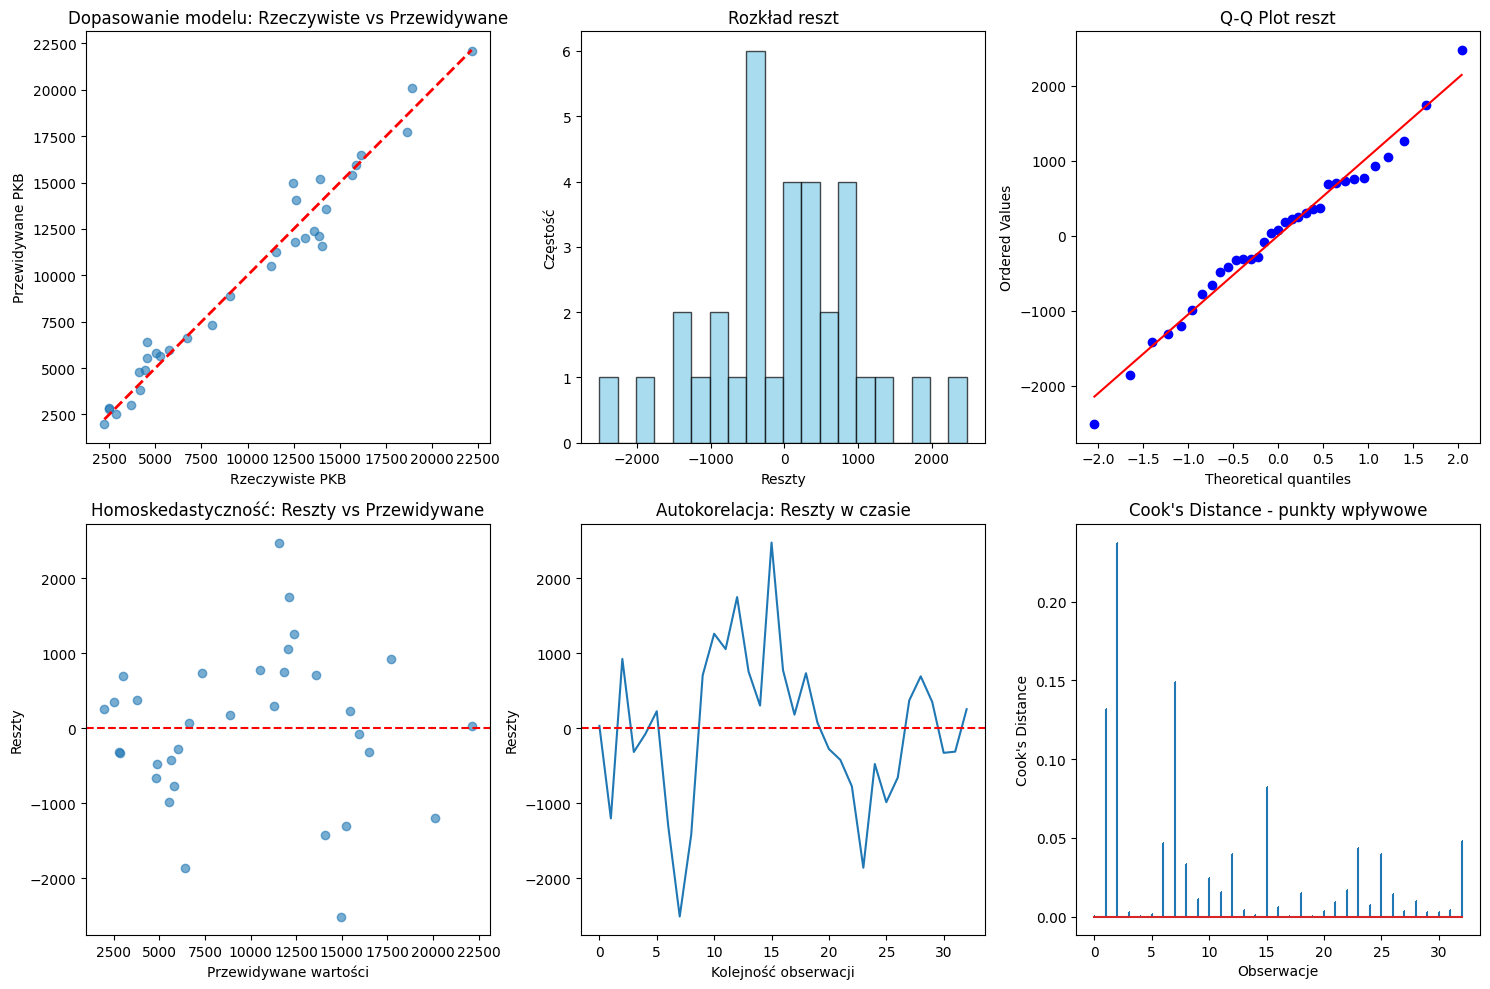


üîç DIAGNOSTYKA MODELU 1:
‚Ä¢ Test Durbina-Watsona: 1.003 (mo≈ºliwa autokorelacja)
‚Ä¢ Wsp√≥≈Çczynniki VIF (multikolinearno≈õƒá):
        Zmienna          VIF
          const 31930.590104
      inflation     3.145143
   unemployment     2.171583
     population     2.284631
life_expectancy     5.804841
‚Ä¢ Wp≈Çywowe obserwacje (Cook's distance > 0.121): 3

üéØ MODEL 2: Inflacja jako zmienna zale≈ºna
                            OLS Regression Results                            
Dep. Variable:              inflation   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     16.34
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           5.16e-07
Time:                        11:15:39   Log-Likelihood:                -119.03
No. Observations:                  33   AIC:                             248.1
Df Residuals:                      28   B

In [ ]:
# --- 7. REGRESJA LINIOWA I DIAGNOSTYKA MODELI ---
print("\n" + "="*60)
print("üìà REGRESJA LINIOWA I DIAGNOSTYKA MODELI")
print("="*60)

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats

# Przygotowanie danych - usuwanie brak√≥w
regression_data = df[["gdp_per_capita", "inflation", "unemployment", "population", "life_expectancy"]].dropna()

if len(regression_data) < 10:
    print("‚ö†Ô∏è Za ma≈Ço danych do regresji")
else:
    print(f"üìä Dane do regresji: {len(regression_data)} obserwacji")

    # --- MODEL 1: PKB jako zmienna zale≈ºna ---
    print("\n" + "="*50)
    print("üéØ MODEL 1: PKB per capita jako zmienna zale≈ºna")
    print("="*50)

    X1 = regression_data[["inflation", "unemployment", "population", "life_expectancy"]]
    X1 = sm.add_constant(X1)  # dodanie interceptu
    y1 = regression_data["gdp_per_capita"]

    model1 = sm.OLS(y1, X1).fit()

    params = model1.params
    print(params)
    print(f"GDP_per_capita = {params['const']:.2f} + "
      f"({params['inflation']:.2f})*inflation + "
      f"({params['unemployment']:.2f})*unemployment + "
      f"({params['population']:.4f})*population + "
      f"({params['life_expectancy']:.2f})*life_expectancy")



    print(model1.summary())

    # --- Wizualizacja dopasowania ---
    plt.figure(figsize=(15, 10))

    # Scatterplot: rzeczywiste vs przewidywane warto≈õci
    plt.subplot(2, 3, 1)
    predicted = model1.predict(X1)
    plt.scatter(y1, predicted, alpha=0.6)
    plt.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'r--', lw=2)
    plt.xlabel('Rzeczywiste PKB')
    plt.ylabel('Przewidywane PKB')
    plt.title('Dopasowanie modelu: Rzeczywiste vs Przewidywane')

    # --- Diagnostyka reszt ---
    residuals = model1.resid #powstaje lista pandas series z resztami, roznica co wyszla a co powinno byc

    # Histogram reszt
    plt.subplot(2, 3, 2)
    plt.hist(residuals, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel('Reszty')
    plt.ylabel('Czƒôsto≈õƒá')
    plt.title('Rozk≈Çad reszt')

    # Q-Q plot reszt
    plt.subplot(2, 3, 3)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot reszt')

    # Reszty vs przewidywane warto≈õci (homoskedastyczno≈õƒá)
    plt.subplot(2, 3, 4)
    plt.scatter(predicted, residuals, alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Przewidywane warto≈õci')
    plt.ylabel('Reszty')
    plt.title('Homoskedastyczno≈õƒá: Reszty vs Przewidywane')

    # Autokorelacja reszt
    plt.subplot(2, 3, 5)
    plt.plot(residuals.values)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Kolejno≈õƒá obserwacji')
    plt.ylabel('Reszty')
    plt.title('Autokorelacja: Reszty w czasie')

    # Cook's distance
    plt.subplot(2, 3, 6)
    influence = model1.get_influence()
    cooks_d = influence.cooks_distance[0]
    plt.stem(range(len(cooks_d)), cooks_d, markerfmt=",")
    plt.xlabel('Obserwacje')
    plt.ylabel("Cook's Distance")
    plt.title("Cook's Distance - punkty wp≈Çywowe")

    plt.tight_layout()
    plt.show()

    # --- Metryki diagnostyczne ---
    print("\nüîç DIAGNOSTYKA MODELU 1:")

    # Test Durbina-Watsona (autokorelacja)
    dw = durbin_watson(residuals)
    print(f"‚Ä¢ Test Durbina-Watsona: {dw:.3f} ({'brak autokorelacji' if 1.5 < dw < 2.5 else 'mo≈ºliwa autokorelacja'})")

    # VIF (multikolinearno≈õƒá)
    print("‚Ä¢ Wsp√≥≈Çczynniki VIF (multikolinearno≈õƒá):")
    vif_data = pd.DataFrame()
    vif_data["Zmienna"] = X1.columns
    vif_data["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
    print(vif_data.to_string(index=False))

    # Cook's distance - punkty wp≈Çywowe
    influential_obs = np.where(cooks_d > 4/len(X1))[0]
    print(f"‚Ä¢ Wp≈Çywowe obserwacje (Cook's distance > {4/len(X1):.3f}): {len(influential_obs)}")

    # --- MODEL 2: Inflacja jako zmienna zale≈ºna ---
    print("\n" + "="*50)
    print("üéØ MODEL 2: Inflacja jako zmienna zale≈ºna")
    print("="*50)

    X2 = regression_data[["gdp_per_capita", "unemployment", "population", "life_expectancy"]]
    X2 = sm.add_constant(X2)
    y2 = regression_data["inflation"]

    model2 = sm.OLS(y2, X2).fit()
    print(model2.summary())

    # --- Wnioski i rekomendacje ---
    print("\n" + "="*60)
    print("üí° WNIOSKI I REKOMENDACJE")
    print("="*60)

    print("1. üìà ANALIZA MULTIKOLINEARNO≈öCI:")
    high_vif = vif_data[vif_data["VIF"] > 10]
    if len(high_vif) > 0:
        print(f"   ‚ö†Ô∏è Wysoka multikolinearno≈õƒá: {list(high_vif['Zmienna'])}")
        print("   üí° Zalecenie: Usu≈Ñ zmienne lub u≈ºyj regularyzacji")
    else:
        print("   ‚úÖ Brak silnej multikolinearno≈õci")

    print("\n2. üìä JAKO≈öƒÜ DOPASOWANIA:")
    print(f"   ‚Ä¢ R¬≤: {model1.rsquared:.3f}")
    print(f"   ‚Ä¢ Adjusted R¬≤: {model1.rsquared_adj:.3f}")

    print("\n3. üéØ PUNKTY WP≈ÅYWOWE:")
    if len(influential_obs) > 0:
        print(f"   ‚ö†Ô∏è {len(influential_obs)} wp≈Çywowych obserwacji - sprawd≈∫ czy nie sƒÖ b≈Çƒôdami")
    else:
        print("   ‚úÖ Brak znaczƒÖcych punkt√≥w wp≈Çywowych")



print("\n" + "="*60)
print("‚úÖ REGRESJA LINIOWA ZAKO≈ÉCZONA")
print("="*60)

PUNKT 5:  Regularyzacja i walidacja modeli
‚Ä¢	Ridge, Lasso, ElasticNet (por√≥wnanie).
‚Ä¢	Dob√≥r parametr√≥w (alpha) z walidacjƒÖ krzy≈ºowƒÖ (cross-validation).
‚Ä¢	Analiza overfittingu/underfittingu.
‚Ä¢	Wykresy b≈Çƒôd√≥w na zbiorze treningowym/testowym.



üîß REGULARYZACJA I WALIDACJA MODELI
üéØ PRZYGOTOWANIE DANYCH DO MODELOWANIA
Liczba obserwacji: 33
Zmienne obja≈õniajƒÖce: ['inflation', 'unemployment', 'population', 'life_expectancy']
Zmienna celu: gdp_per_capita

üìä Rozmiary zbior√≥w:
Treningowy: (23, 4)
Testowy: (10, 4)

üìà POR√ìWNANIE MODELI Z REGULARYZACJƒÑ

üîπ Linear Regression:
   MSE trening: 997893.02
   MSE test:    25181059.34
   R¬≤ trening:  0.9478
   R¬≤ test:     -30.9369
   MAE trening: 820.48
   MAE test:    4726.55
   ‚ö†Ô∏è  POTENCJALNY OVERFITTING (ratio: 25.23)

üîπ Ridge (L2):
   MSE trening: 1014206.74
   MSE test:    28372622.18
   R¬≤ trening:  0.9469
   R¬≤ test:     -34.9847
   MAE trening: 839.20
   MAE test:    4951.21
   ‚ö†Ô∏è  POTENCJALNY OVERFITTING (ratio: 27.98)

üîπ Lasso (L1):
   MSE trening: 997894.98
   MSE test:    25097465.95
   R¬≤ trening:  0.9478
   R¬≤ test:     -30.8309
   MAE trening: 820.69
   MAE test:    4719.90
   ‚ö†Ô∏è  POTENCJALNY OVERFITTING (ratio: 25.15)

üîπ Elastic

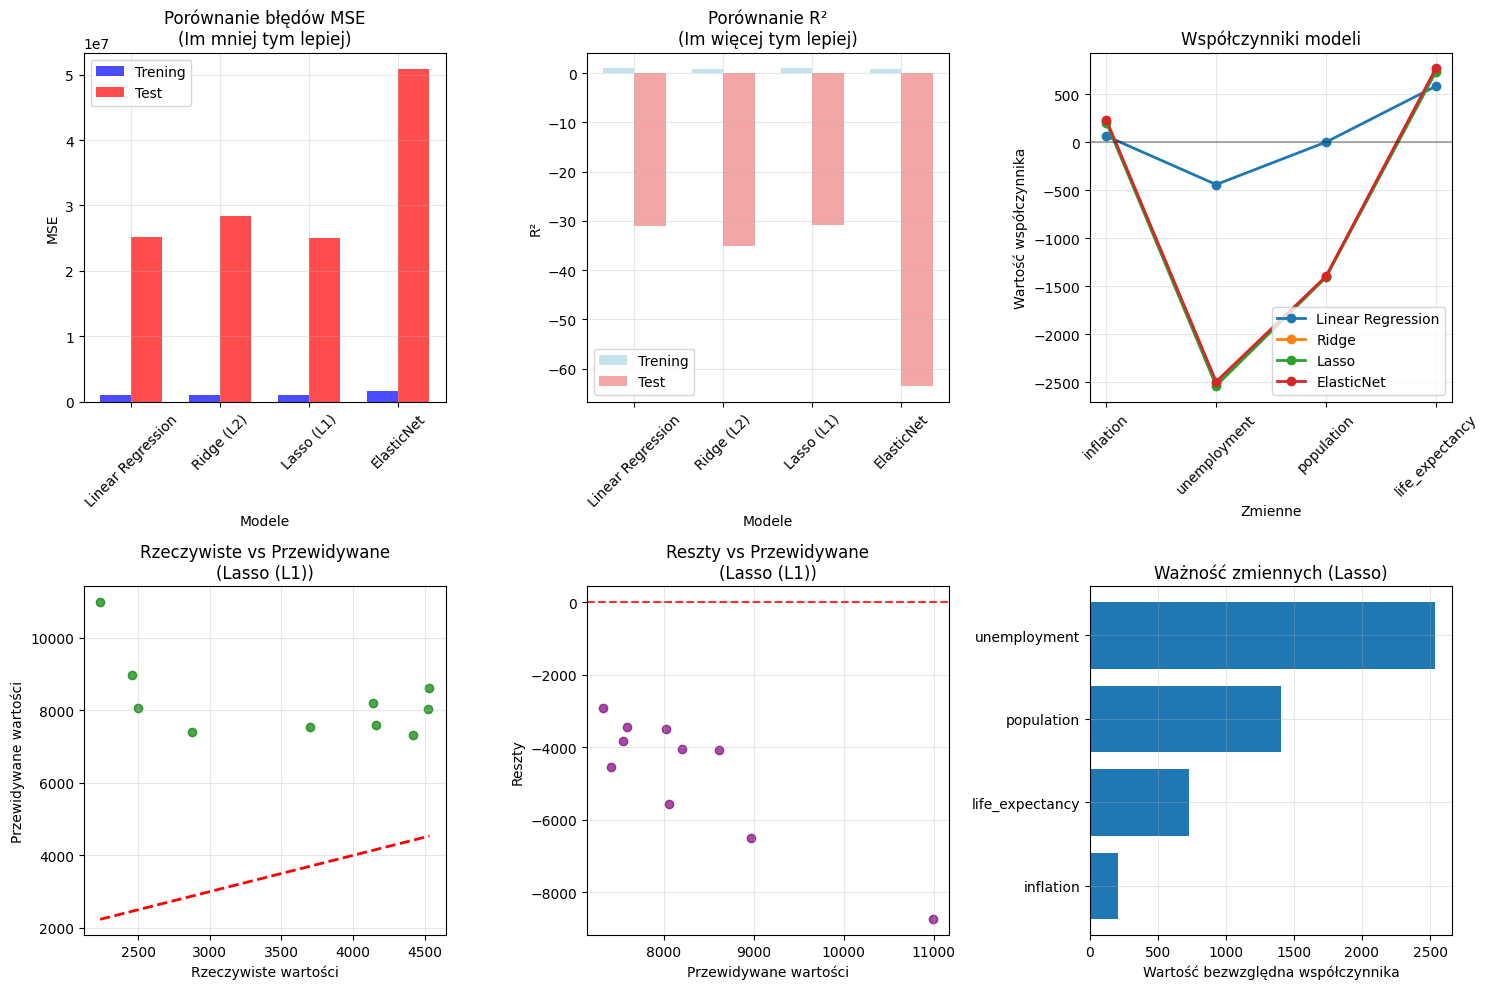


üìö KRZYWE UCZENIA
Generowanie krzywych uczenia...


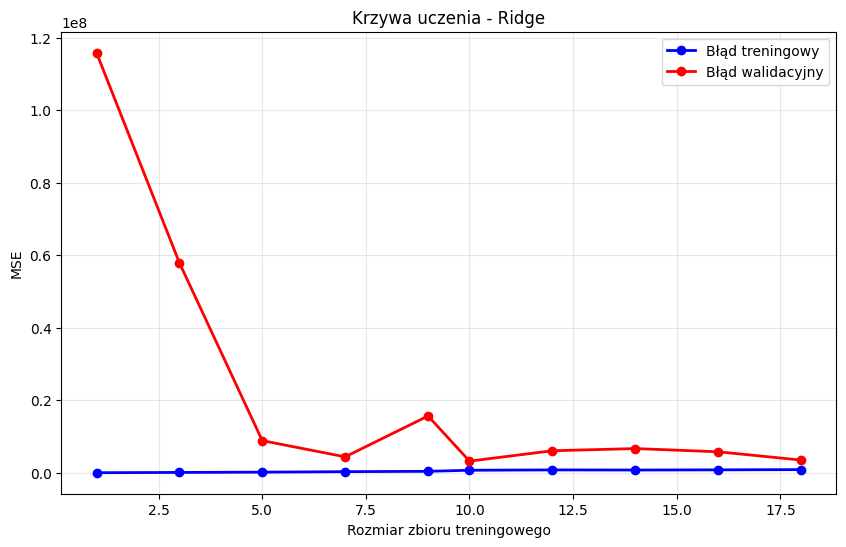

   Ridge: R√≥≈ºnica b≈Çƒôdu ko≈Ñcowego = 2629652.84
   ‚ö†Ô∏è  Wykryto overfitting


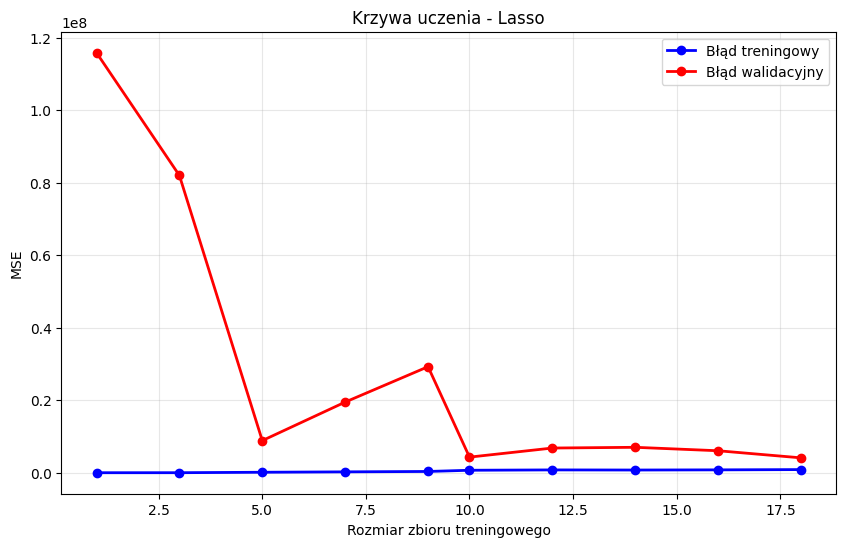

   Lasso: R√≥≈ºnica b≈Çƒôdu ko≈Ñcowego = 3236824.45
   ‚ö†Ô∏è  Wykryto overfitting

‚úÖ REGULARYZACJA ZAKO≈ÉCZONA - WNIOSKI:

üéØ NAJLEPSZY MODEL: Lasso (L1)
   MSE test: 25097465.95
   R¬≤ test:  -30.8309
   MAE test: 4719.90

üìä POR√ìWNANIE REGULARYZACJI:
   ‚Ä¢ Linear Regression - brak regularyzacji, podatny na overfitting
   ‚Ä¢ Ridge (L2) - zmniejsza wsp√≥≈Çczynniki r√≥wnomiernie
   ‚Ä¢ Lasso (L1) - mo≈ºe zerowaƒá nieistotne zmienne (selekcja cech)
   ‚Ä¢ ElasticNet - kompromis miƒôdzy L1 i L2

‚ö†Ô∏è  ANALIZA OVERFITTINGU:
   Ratio test/trening: 25.15
   Wykryto potencjalny overfitting!
   üí° Sugestia: Zwiƒôksz regularyzacjƒô lub zdobƒÖd≈∫ wiƒôcej danych

üí° SUGESTIE DALSZYCH DZIA≈ÅA≈É:
   ‚Ä¢ Eksperymentuj z r√≥≈ºnymi warto≈õciami parametr√≥w regularyzacji
   ‚Ä¢ Rozwa≈º u≈ºycie bardziej z≈Ço≈ºonych modeli (Random Forest, Gradient Boosting)
   ‚Ä¢ Sprawd≈∫ interakcje miƒôdzy zmiennymi
   ‚Ä¢ Zbierz wiƒôcej danych je≈õli to mo≈ºliwe

üíæ Wyniki zapisane do: regularyzacja_

In [ ]:
# --- 8. REGULARYZACJA I WALIDACJA MODELI ---
print("\n" + "="*60)
print("üîß REGULARYZACJA I WALIDACJA MODELI")
print("="*60)

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Przygotowanie danych do modelowania
print("üéØ PRZYGOTOWANIE DANYCH DO MODELOWANIA")

# Usuwanie brakujƒÖcych warto≈õci
model_df = df[['gdp_per_capita', 'inflation', 'unemployment', 'population', 'life_expectancy']].dropna()

# Zmienna celu: GDP per capita
X = model_df[['inflation', 'unemployment', 'population', 'life_expectancy']]
y = model_df['gdp_per_capita']

print(f"Liczba obserwacji: {len(X)}")
print(f"Zmienne obja≈õniajƒÖce: {list(X.columns)}")
print(f"Zmienna celu: gdp_per_capita")

# Podzia≈Ç na zbi√≥r treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Skalowanie cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nüìä Rozmiary zbior√≥w:")
print(f"Treningowy: {X_train_scaled.shape}")
print(f"Testowy: {X_test_scaled.shape}")

# --- Por√≥wnanie modeli z regularyzacjƒÖ ---
print("\n" + "="*50)
print("üìà POR√ìWNANIE MODELI Z REGULARYZACJƒÑ")
print("="*50)

# Modele do por√≥wnania
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (L2)': Ridge(alpha=1.0),
    'Lasso (L1)': Lasso(alpha=1.0, max_iter=10000),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000)
}

results = {}

for name, model in models.items():
    # Trenowanie modelu
    if name == 'Linear Regression':
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)

    # Obliczanie metryk
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    results[name] = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'model': model
    }

    print(f"\nüîπ {name}:")
    print(f"   MSE trening: {train_mse:.2f}")
    print(f"   MSE test:    {test_mse:.2f}")
    print(f"   R¬≤ trening:  {train_r2:.4f}")
    print(f"   R¬≤ test:     {test_r2:.4f}")
    print(f"   MAE trening: {train_mae:.2f}")
    print(f"   MAE test:    {test_mae:.2f}")

    # Analiza overfittingu
    overfit_ratio = test_mse / train_mse if train_mse > 0 else float('inf')
    if overfit_ratio > 2.0:
        print(f"   ‚ö†Ô∏è  POTENCJALNY OVERFITTING (ratio: {overfit_ratio:.2f})")
    elif overfit_ratio < 0.8:
        print(f"   ‚ö†Ô∏è  POTENCJALNY UNDERFITTING (ratio: {overfit_ratio:.2f})")
    else:
        print(f"   ‚úÖ DOBRZE UOG√ìLNIA (ratio: {overfit_ratio:.2f})")

# --- Dob√≥r parametr√≥w z walidacjƒÖ krzy≈ºowƒÖ ---
print("\n" + "="*50)
print("üéØ DOB√ìR PARAMETR√ìW - WALIDACJA KRZY≈ªOWA")
print("="*50)

# Parametry do tuningu
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # tylko dla ElasticNet
}

# Tuning dla Ridge
print("\nüîç Tuning parametr√≥w dla Ridge:")
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': param_grid['alpha']},
                       cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_cv.fit(X_train_scaled, y_train)
print(f"   Najlepszy alpha: {ridge_cv.best_params_['alpha']}")
print(f"   Najlepszy MSE: {-ridge_cv.best_score_:.2f}")

# Tuning dla Lasso
print("\nüîç Tuning parametr√≥w dla Lasso:")
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_grid={'alpha': param_grid['alpha']},
                       cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_cv.fit(X_train_scaled, y_train)
print(f"   Najlepszy alpha: {lasso_cv.best_params_['alpha']}")
print(f"   Najlepszy MSE: {-lasso_cv.best_score_:.2f}")

# Tuning dla ElasticNet
print("\nüîç Tuning parametr√≥w dla ElasticNet:")
elastic_cv = GridSearchCV(ElasticNet(max_iter=10000), param_grid=param_grid,
                         cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
elastic_cv.fit(X_train_scaled, y_train)
print(f"   Najlepsze parametry: {elastic_cv.best_params_}")
print(f"   Najlepszy MSE: {-elastic_cv.best_score_:.2f}")

# --- Analiza wsp√≥≈Çczynnik√≥w modeli ---
print("\n" + "="*50)
print("üìä ANALIZA WSP√ì≈ÅCZYNNIK√ìW MODELI")
print("="*50)

# Modele z optymalnymi parametrami
best_ridge = Ridge(alpha=ridge_cv.best_params_['alpha'])
best_lasso = Lasso(alpha=lasso_cv.best_params_['alpha'], max_iter=10000)
best_elastic = ElasticNet(alpha=elastic_cv.best_params_['alpha'],
                         l1_ratio=elastic_cv.best_params_['l1_ratio'],
                         max_iter=10000)

# Trenowanie najlepszych modeli
best_ridge.fit(X_train_scaled, y_train)
best_lasso.fit(X_train_scaled, y_train)
best_elastic.fit(X_train_scaled, y_train)

# Por√≥wnanie wsp√≥≈Çczynnik√≥w
coefficients = pd.DataFrame({
    'Zmienna': X.columns,
    'Linear Regression': results['Linear Regression']['model'].coef_,
    'Ridge': best_ridge.coef_,
    'Lasso': best_lasso.coef_,
    'ElasticNet': best_elastic.coef_
})

print("\nWsp√≥≈Çczynniki modeli:")
print(coefficients.round(4))

# Analiza selekcji zmiennych przez Lasso
lasso_nonzero = (best_lasso.coef_ != 0).sum()
lasso_zero = (best_lasso.coef_ == 0).sum()
print(f"\nüîç Lasso - selekcja zmiennych:")
print(f"   Wybrane zmienne: {lasso_nonzero}/{len(X.columns)}")
print(f"   Wyzerowane zmienne: {lasso_zero}/{len(X.columns)}")
if lasso_zero > 0:
    excluded_vars = X.columns[best_lasso.coef_ == 0].tolist()
    print(f"   Wykluczone zmienne: {excluded_vars}")

# --- Wykresy b≈Çƒôd√≥w i por√≥wnanie modeli ---
print("\n" + "="*50)
print("üìà WYKRESY B≈ÅƒòD√ìW I POR√ìWNANIE")
print("="*50)

# Wykres por√≥wnania b≈Çƒôd√≥w
plt.figure(figsize=(15, 10))

# 1. Por√≥wnanie MSE
plt.subplot(2, 3, 1)
model_names = list(results.keys())
train_errors = [results[name]['train_mse'] for name in model_names]
test_errors = [results[name]['test_mse'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, train_errors, width, label='Trening', alpha=0.7, color='blue')
plt.bar(x + width/2, test_errors, width, label='Test', alpha=0.7, color='red')

plt.xlabel('Modele')
plt.ylabel('MSE')
plt.title('Por√≥wnanie b≈Çƒôd√≥w MSE\n(Im mniej tym lepiej)')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Por√≥wnanie R¬≤
plt.subplot(2, 3, 2)
train_r2_scores = [results[name]['train_r2'] for name in model_names]
test_r2_scores = [results[name]['test_r2'] for name in model_names]

plt.bar(x - width/2, train_r2_scores, width, label='Trening', alpha=0.7, color='lightblue')
plt.bar(x + width/2, test_r2_scores, width, label='Test', alpha=0.7, color='lightcoral')

plt.xlabel('Modele')
plt.ylabel('R¬≤')
plt.title('Por√≥wnanie R¬≤\n(Im wiƒôcej tym lepiej)')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Wykres wsp√≥≈Çczynnik√≥w
plt.subplot(2, 3, 3)
for i, model_name in enumerate(['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet']):
    if model_name == 'Linear Regression':
        coefs = results['Linear Regression']['model'].coef_
    elif model_name == 'Ridge':
        coefs = best_ridge.coef_
    elif model_name == 'Lasso':
        coefs = best_lasso.coef_
    else:
        coefs = best_elastic.coef_

    plt.plot(range(len(coefs)), coefs, marker='o', label=model_name, linewidth=2, markersize=6)

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Zmienne')
plt.ylabel('Warto≈õƒá wsp√≥≈Çczynnika')
plt.title('Wsp√≥≈Çczynniki modeli')
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Wykres rzeczywiste vs przewidywane warto≈õci dla najlepszego modelu
plt.subplot(2, 3, 4)
best_model_name = min(results.keys(), key=lambda x: results[x]['test_mse'])
best_model = results[best_model_name]['model']

if best_model_name == 'Linear Regression':
    y_pred_best = best_model.predict(X_test)
else:
    y_pred_best = best_model.predict(X_test_scaled)

plt.scatter(y_test, y_pred_best, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Rzeczywiste warto≈õci')
plt.ylabel('Przewidywane warto≈õci')
plt.title(f'Rzeczywiste vs Przewidywane\n({best_model_name})')
plt.grid(True, alpha=0.3)

# 5. Wykres reszt dla najlepszego modelu
plt.subplot(2, 3, 5)
residuals_best = y_test - y_pred_best
plt.scatter(y_pred_best, residuals_best, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.8)
plt.xlabel('Przewidywane warto≈õci')
plt.ylabel('Reszty')
plt.title(f'Reszty vs Przewidywane\n({best_model_name})')
plt.grid(True, alpha=0.3)

# 6. Wykres wa≈ºno≈õci zmiennych (Lasso)
plt.subplot(2, 3, 6)
lasso_importance = pd.DataFrame({
    'Zmienna': X.columns,
    'Wsp√≥≈Çczynnik': np.abs(best_lasso.coef_)
}).sort_values('Wsp√≥≈Çczynnik', ascending=True)

plt.barh(range(len(lasso_importance)), lasso_importance['Wsp√≥≈Çczynnik'])
plt.yticks(range(len(lasso_importance)), lasso_importance['Zmienna'])
plt.xlabel('Warto≈õƒá bezwzglƒôdna wsp√≥≈Çczynnika')
plt.title('Wa≈ºno≈õƒá zmiennych (Lasso)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- Krzywe uczenia ---
print("\n" + "="*50)
print("üìö KRZYWE UCZENIA")
print("="*50)

def plot_learning_curve(model, X, y, model_name, scaling_required=False):
    if scaling_required:
        scaler_temp = StandardScaler()
        X_scaled = scaler_temp.fit_transform(X)
    else:
        X_scaled = X

    train_sizes, train_scores, test_scores = learning_curve(
        model, X_scaled, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='neg_mean_squared_error',
        random_state=42
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='B≈ÇƒÖd treningowy', linewidth=2)
    plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='B≈ÇƒÖd walidacyjny', linewidth=2)
    plt.xlabel('Rozmiar zbioru treningowego')
    plt.ylabel('MSE')
    plt.title(f'Krzywa uczenia - {model_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Analiza overfittingu z krzywej uczenia
    final_gap = test_scores_mean[-1] - train_scores_mean[-1]
    print(f"   {model_name}: R√≥≈ºnica b≈Çƒôdu ko≈Ñcowego = {final_gap:.2f}")
    if final_gap > train_scores_mean[-1] * 0.5:
        print(f"   ‚ö†Ô∏è  Wykryto overfitting")
    elif final_gap < train_scores_mean[-1] * 0.1:
        print(f"   ‚ö†Ô∏è  Wykryto underfitting")
    else:
        print(f"   ‚úÖ Dobra r√≥wnowaga")

    return train_scores_mean, test_scores_mean

# Krzywe uczenia dla najlepszych modeli
print("Generowanie krzywych uczenia...")
plot_learning_curve(best_ridge, X_train, y_train, "Ridge", scaling_required=True)
plot_learning_curve(best_lasso, X_train, y_train, "Lasso", scaling_required=True)

# --- Podsumowanie ---
print("\n" + "="*60)
print("‚úÖ REGULARYZACJA ZAKO≈ÉCZONA - WNIOSKI:")
print("="*60)

print(f"\nüéØ NAJLEPSZY MODEL: {best_model_name}")
print(f"   MSE test: {results[best_model_name]['test_mse']:.2f}")
print(f"   R¬≤ test:  {results[best_model_name]['test_r2']:.4f}")
print(f"   MAE test: {results[best_model_name]['test_mae']:.2f}")

print(f"\nüìä POR√ìWNANIE REGULARYZACJI:")
print("   ‚Ä¢ Linear Regression - brak regularyzacji, podatny na overfitting")
print("   ‚Ä¢ Ridge (L2) - zmniejsza wsp√≥≈Çczynniki r√≥wnomiernie")
print("   ‚Ä¢ Lasso (L1) - mo≈ºe zerowaƒá nieistotne zmienne (selekcja cech)")
print("   ‚Ä¢ ElasticNet - kompromis miƒôdzy L1 i L2")

print(f"\n‚ö†Ô∏è  ANALIZA OVERFITTINGU:")
best_ratio = results[best_model_name]['test_mse'] / results[best_model_name]['train_mse']
print(f"   Ratio test/trening: {best_ratio:.2f}")
if best_ratio > 1.5:
    print("   Wykryto potencjalny overfitting!")
    print("   üí° Sugestia: Zwiƒôksz regularyzacjƒô lub zdobƒÖd≈∫ wiƒôcej danych")
elif best_ratio < 0.7:
    print("   Wykryto potencjalny underfitting!")
    print("   üí° Sugestia: Zmniejsz regularyzacjƒô lub dodaj bardziej z≈Ço≈ºone cechy")
else:
    print("   Model dobrze uog√≥lnia!")

print(f"\nüí° SUGESTIE DALSZYCH DZIA≈ÅA≈É:")
print("   ‚Ä¢ Eksperymentuj z r√≥≈ºnymi warto≈õciami parametr√≥w regularyzacji")
print("   ‚Ä¢ Rozwa≈º u≈ºycie bardziej z≈Ço≈ºonych modeli (Random Forest, Gradient Boosting)")
print("   ‚Ä¢ Sprawd≈∫ interakcje miƒôdzy zmiennymi")
print("   ‚Ä¢ Zbierz wiƒôcej danych je≈õli to mo≈ºliwe")

# Zapis wynik√≥w do pliku
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MSE_Train': [results[name]['train_mse'] for name in results.keys()],
    'MSE_Test': [results[name]['test_mse'] for name in results.keys()],
    'R2_Train': [results[name]['train_r2'] for name in results.keys()],
    'R2_Test': [results[name]['test_r2'] for name in results.keys()],
    'MAE_Train': [results[name]['train_mae'] for name in results.keys()],
    'MAE_Test': [results[name]['test_mae'] for name in results.keys()]
})

results_df.to_csv('regularyzacja_wyniki.csv', index=False)
print(f"\nüíæ Wyniki zapisane do: regularyzacja_wyniki.csv")

CZESC 6: Szeregi czasowe (time series)
‚Ä¢	Przekszta≈Çcenie kolumny daty na indeks czasowy.
‚Ä¢	Analiza stacjonarno≈õci (ADF test).
‚Ä¢	Dekompozycja sygna≈Çu (trend + sezonowo≈õƒá + reszty).
‚Ä¢	Modele AR, MA, ARIMA.
‚Ä¢	Prognozowanie na kilka krok√≥w wprz√≥d.
‚Ä¢	Por√≥wnanie prognoz z rzeczywisto≈õciƒÖ (MAPE, RMSE).
‚Ä¢  Autokorelacja w szeregach czasowych
‚Ä¢	wykresy ACF/PACF,
‚Ä¢	interpretacja przed modelem ARIMA.



‚è∞ ANALIZA SZEREG√ìW CZASOWYCH
üìÖ PRZEKSZTA≈ÅCENIE DANYCH NA SZEREG CZASOWY
Dane szereg√≥w czasowych:
            gdp_per_capita  inflation  unemployment
date                                               
1991-01-01     2235.541089  76.769499        13.611
1992-01-01     2459.020685  46.098562        13.645
1993-01-01     2497.130559  36.964167        14.393
1994-01-01     2874.831636  32.991277        14.825
1995-01-01     3700.959568  27.951389        13.695

Zakres czasowy: 1991-01-01 00:00:00 - 2024-01-01 00:00:00
Liczba obserwacji: 34

üìä ANALIZA STACJONARNO≈öCI (ADF TEST)

üîç Analiza stacjonarno≈õci dla: gdp_per_capita
ADF Statistic: 0.921530
p-value: 0.993365
Critical Values:
   1%: -3.738
   5%: -2.992
   10%: -2.636
‚ùå gdp_per_capita - SERIE NIE STACJONARNE (p-value > 0.05)

üîç Analiza stacjonarno≈õci dla: inflation
ADF Statistic: -3.383737
p-value: 0.011526
Critical Values:
   1%: -3.654
   5%: -2.957
   10%: -2.618
‚úÖ inflation - SERIE STACJONARNE (p-value ‚â§ 0

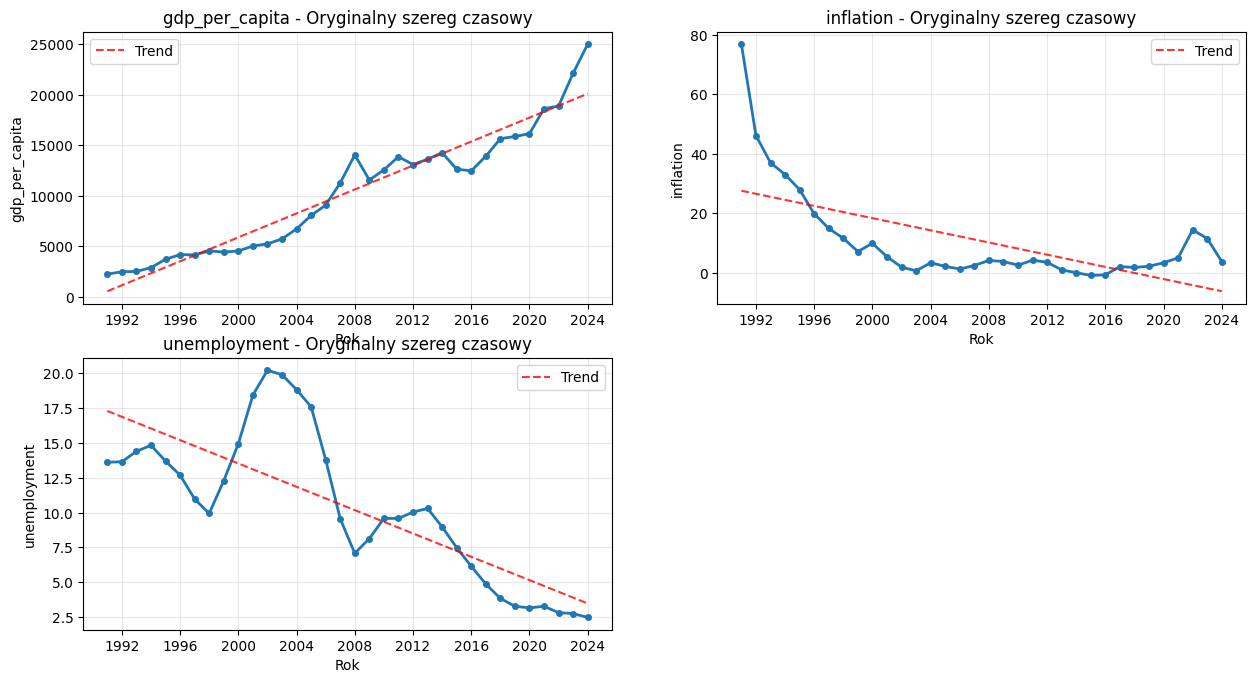

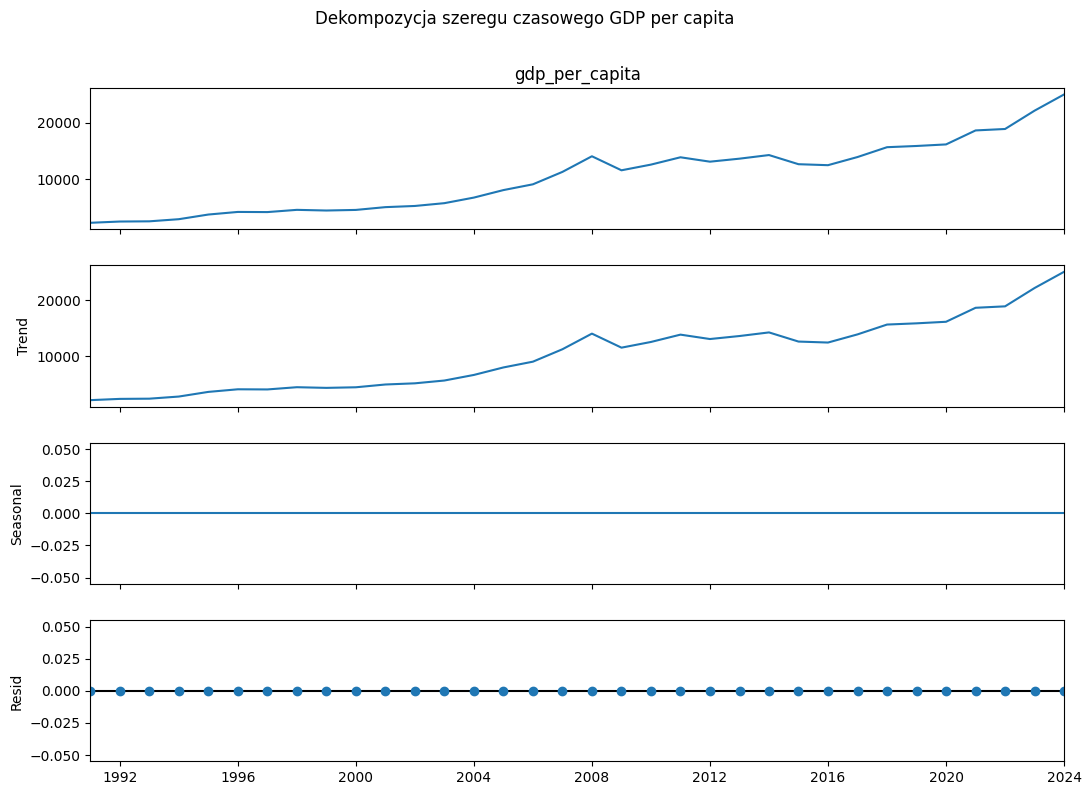

‚úÖ Dekompozycja wykonana pomy≈õlnie

üîÑ AUTOKORELACJA - WYKRESY ACF/PACF


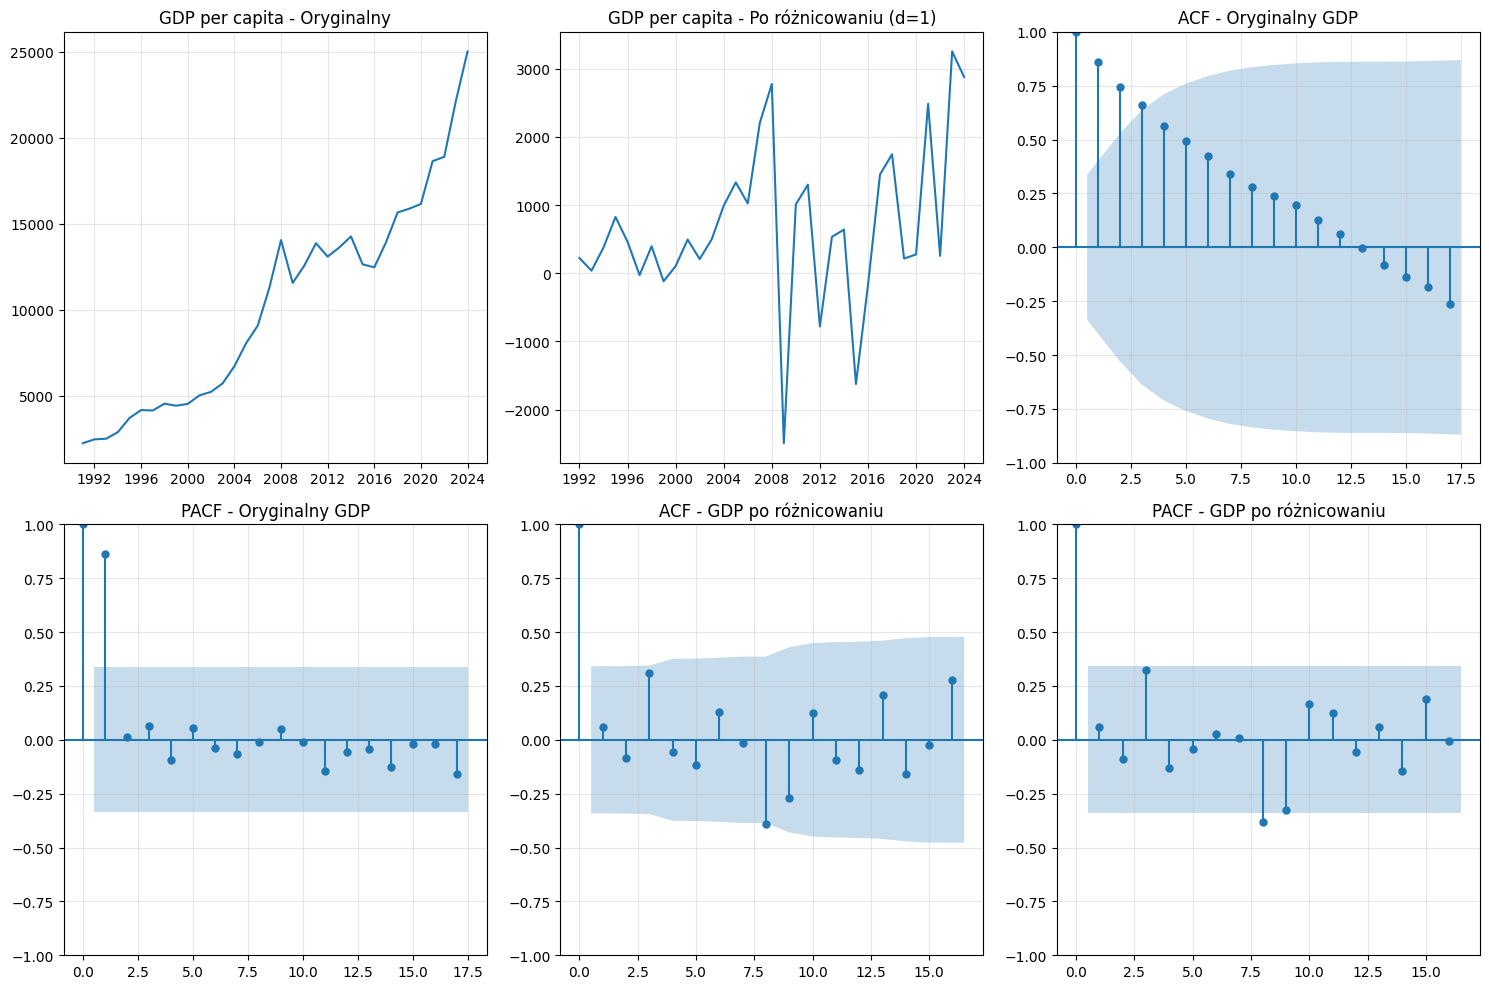


üìã INTERPRETACJA ACF/PACF:
‚Ä¢ ACF powoli zanika ‚Üí potrzeba r√≥≈ºnicowania (d > 0)
‚Ä¢ PACF ma znaczƒÖce op√≥≈∫nienia ‚Üí wskazuje na rzƒÖd AR
‚Ä¢ ACF ma znaczƒÖce op√≥≈∫nienia ‚Üí wskazuje na rzƒÖd MA

üéØ MODELE ARIMA
Podzia≈Ç danych:
Trening: 27 obserwacji (1991-01-01 00:00:00 - 2017-01-01 00:00:00)
Test: 7 obserwacji (2018-01-01 00:00:00 - 2024-01-01 00:00:00)

üîß Trenowanie ARIMA(1,1,1)...
   ‚úÖ ARIMA(1,1,1) - MSE: 35542434.16, MAE: 4977.60, MAPE: 24.26%, RMSE: 5961.75
   üìä AIC: 443.41, BIC: 447.18

üîß Trenowanie ARIMA(1,1,0)...
   ‚úÖ ARIMA(1,1,0) - MSE: 34572902.55, MAE: 4880.93, MAPE: 23.74%, RMSE: 5879.87
   üìä AIC: 443.18, BIC: 445.69

üîß Trenowanie ARIMA(0,1,1)...
   ‚úÖ ARIMA(0,1,1) - MSE: 34316311.91, MAE: 4853.66, MAPE: 23.59%, RMSE: 5858.01
   üìä AIC: 443.14, BIC: 445.66

üìä WIZUALIZACJA PROGNOZ


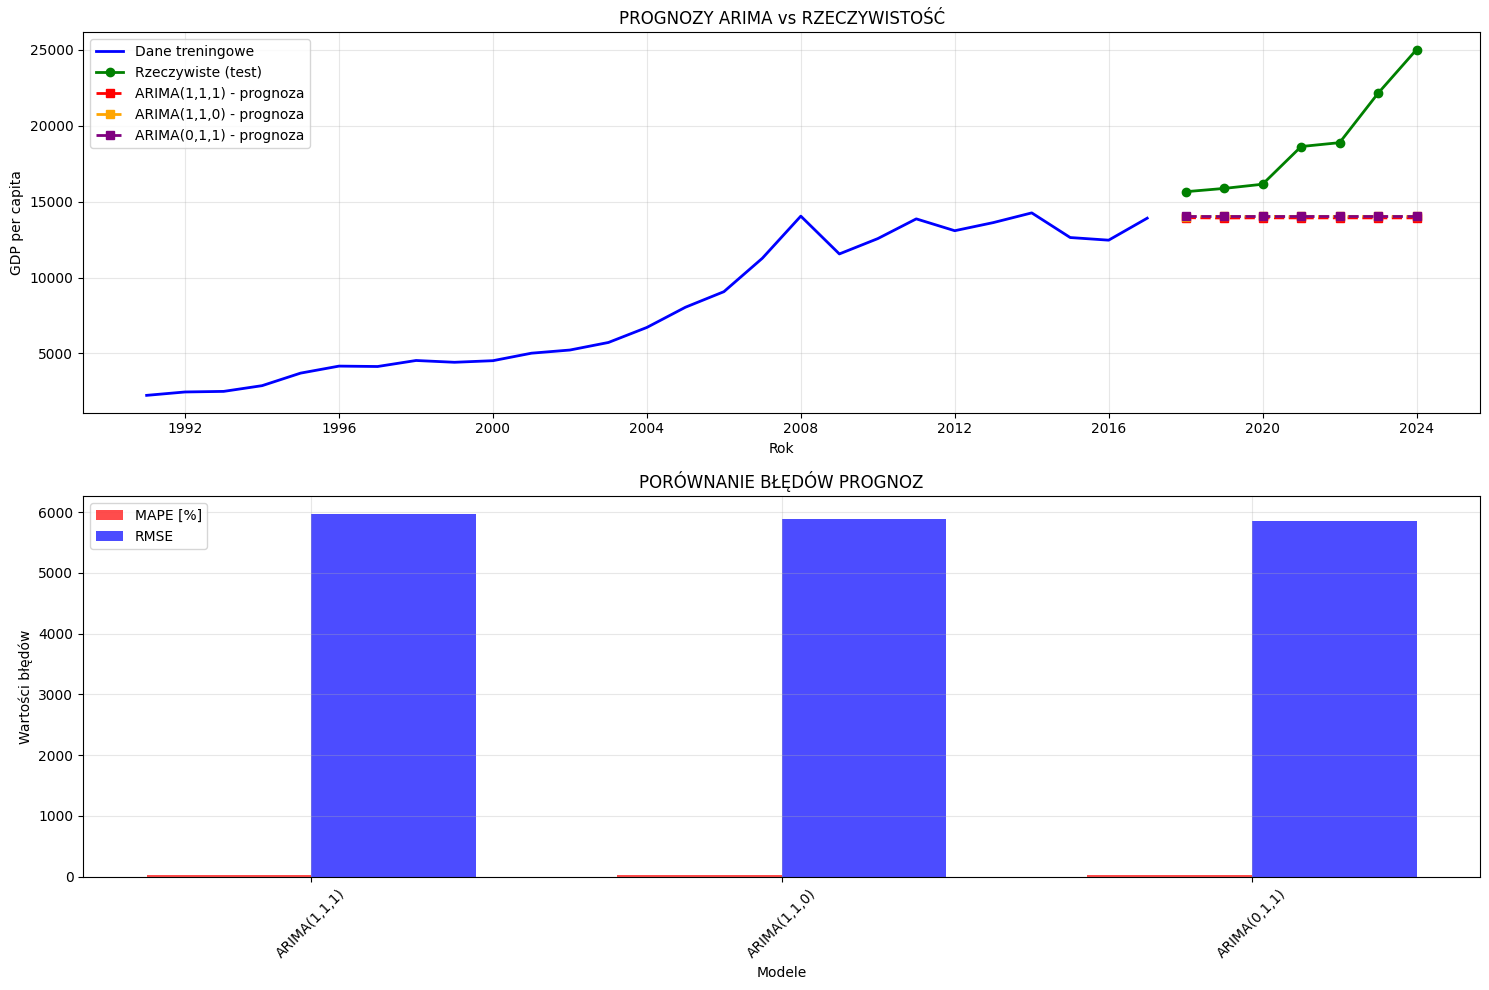


üìà POR√ìWNANIE PROGNOZ Z RZECZYWISTO≈öCIƒÑ

üìä TABELA POR√ìWNANIA MODELI:
          Model           MSE       RMSE        MAE     MAPE       AIC  \
0  ARIMA(1,1,1)  3.554243e+07  5961.7476  4977.5956  24.2618  443.4058   
1  ARIMA(1,1,0)  3.457290e+07  5879.8727  4880.9336  23.7388  443.1779   
2  ARIMA(0,1,1)  3.431631e+07  5858.0126  4853.6595  23.5893  443.1430   

        BIC  
0  447.1801  
1  445.6941  
2  445.6592  

üéØ NAJLEPSZY MODEL: ARIMA(0,1,1)
   MAPE: 23.59%
   RMSE: 5858.01

‚úÖ ANALIZA SZEREG√ìW CZASOWYCH ZAKO≈ÉCZONA

üìã PODSUMOWANIE WYNIK√ìW:
‚Ä¢ Liczba analizowanych szereg√≥w: 3
‚Ä¢ Zakres czasowy: 1991 - 2024
‚Ä¢ Test stacjonarno≈õci: 1/3 szereg√≥w stacjonarnych
‚Ä¢ Najlepszy model ARIMA: ARIMA(0,1,1) (MAPE: 23.59%)

üí° WNIOSKI I OBSERWACJE:
‚Ä¢ Wykresy ACF/PACF pomagajƒÖ w doborze parametr√≥w ARIMA
‚Ä¢ Modele z ni≈ºszym MAPE lepiej przewidujƒÖ przysz≈Çe warto≈õci
‚Ä¢ Regularna aktualizacja danych poprawia jako≈õƒá prognoz

üíæ Wyniki zapisane do: arima_w

In [ ]:
# --- 9. ANALIZA SZEREG√ìW CZASOWYCH ---
print("\n" + "="*60)
print("‚è∞ ANALIZA SZEREG√ìW CZASOWYCH")
print("="*60)

import warnings
warnings.filterwarnings('ignore')

# --- Przekszta≈Çcenie kolumny daty na indeks czasowy ---
print("üìÖ PRZEKSZTA≈ÅCENIE DANYCH NA SZEREG CZASOWY")

# Przygotowanie danych czasowych - upewnij siƒô ≈ºe dane sƒÖ posortowane i bez brak√≥w
ts_data = df[['date', 'gdp_per_capita', 'inflation', 'unemployment']].copy()
ts_data = ts_data.dropna()  # usuwamy braki
ts_data['date'] = pd.to_datetime(ts_data['date'], format='%Y')
ts_data = ts_data.sort_values('date').set_index('date')

print("Dane szereg√≥w czasowych:")
print(ts_data.head())
print(f"\nZakres czasowy: {ts_data.index.min()} - {ts_data.index.max()}")
print(f"Liczba obserwacji: {len(ts_data)}")

# --- Analiza stacjonarno≈õci (ADF test) ---
print("\n" + "="*50)
print("üìä ANALIZA STACJONARNO≈öCI (ADF TEST)")
print("="*50)

from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries, name):
    print(f"\nüîç Analiza stacjonarno≈õci dla: {name}")

    # Test ADF
    result = adfuller(timeseries.dropna())
    print(f'ADF Statistic: {result[0]:.6f}')
    print(f'p-value: {result[1]:.6f}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.3f}')

    if result[1] <= 0.05:
        print(f"‚úÖ {name} - SERIE STACJONARNE (p-value ‚â§ 0.05)")
    else:
        print(f"‚ùå {name} - SERIE NIE STACJONARNE (p-value > 0.05)")

    return result[1]

# Test stacjonarno≈õci dla wszystkich wska≈∫nik√≥w
p_values = {}
for col in ['gdp_per_capita', 'inflation', 'unemployment']:
    if col in ts_data.columns:
        p_values[col] = check_stationarity(ts_data[col], col)

# --- Wizualizacja szereg√≥w czasowych ---
print("\n" + "="*50)
print("üìà WIZUALIZACJA SZEREG√ìW CZASOWYCH")
print("="*50)

plt.figure(figsize=(15, 12))

# Wykres oryginalnych szereg√≥w
for i, col in enumerate(['gdp_per_capita', 'inflation', 'unemployment'], 1):
    if col not in ts_data.columns:
        continue

    plt.subplot(3, 2, i)
    series_data = ts_data[col].dropna()
    plt.plot(series_data.index, series_data, marker='o', linewidth=2, markersize=4)
    plt.title(f'{col} - Oryginalny szereg czasowy')
    plt.xlabel('Rok')
    plt.ylabel(col)
    plt.grid(True, alpha=0.3)

    # Dodanie trendu - POPRAWIONE: u≈ºywamy tylko dostƒôpnych danych
    if len(series_data) > 1:
        x_values = np.arange(len(series_data))
        z = np.polyfit(x_values, series_data.values, 1)
        p = np.poly1d(z)
        plt.plot(series_data.index, p(x_values), 'r--', alpha=0.8, label='Trend')
        plt.legend()

# --- Dekompozycja sygna≈Çu ---
print("\n" + "="*50)
print("üîß DEKOMPOZYCJA SYGNA≈ÅU")
print("="*50)

from statsmodels.tsa.seasonal import seasonal_decompose

# Dekompozycja dla PKB (najwa≈ºniejszy wska≈∫nik)
gdp_series = ts_data['gdp_per_capita'].dropna()

# Sprawdzenie czy mamy wystarczajƒÖco danych do dekompozycji
if len(gdp_series) >= 8:  # minimum dla dekompozycji
    try:
        # U≈ºywamy okresu=1 dla danych rocznych bez sezonowo≈õci
        decomposition = seasonal_decompose(gdp_series, model='additive', period=1)

        # Wykres dekompozycji
        fig = decomposition.plot()
        fig.set_size_inches(12, 8)
        plt.suptitle('Dekompozycja szeregu czasowego GDP per capita', y=1.02)
        plt.show()

        print("‚úÖ Dekompozycja wykonana pomy≈õlnie")

    except Exception as e:
        print(f"‚ùå B≈ÇƒÖd dekompozycji: {e}")
else:
    print("‚ö†Ô∏è Za ma≈Ço danych do dekompozycji (potrzeba min. 8 obserwacji)")

# --- Autokorelacja (ACF/PACF) ---
print("\n" + "="*50)
print("üîÑ AUTOKORELACJA - WYKRESY ACF/PACF")
print("="*50)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF/PACF dla GDP
gdp_stationary = gdp_series.diff().dropna()  # r√≥≈ºnicowanie dla stacjonarno≈õci

plt.figure(figsize=(15, 10))

# Oryginalny szereg
plt.subplot(2, 3, 1)
plt.plot(gdp_series)
plt.title('GDP per capita - Oryginalny')
plt.grid(True, alpha=0.3)

# R√≥≈ºnicowany szereg
plt.subplot(2, 3, 2)
plt.plot(gdp_stationary)
plt.title('GDP per capita - Po r√≥≈ºnicowaniu (d=1)')
plt.grid(True, alpha=0.3)

# ACF oryginalny
plt.subplot(2, 3, 3)
plot_acf(gdp_series, ax=plt.gca(), lags=min(20, len(gdp_series)//2), title='ACF - Oryginalny GDP')
plt.grid(True, alpha=0.3)

# PACF oryginalny
plt.subplot(2, 3, 4)
plot_pacf(gdp_series, ax=plt.gca(), lags=min(20, len(gdp_series)//2), title='PACF - Oryginalny GDP')
plt.grid(True, alpha=0.3)

# ACF r√≥≈ºnicowany
plt.subplot(2, 3, 5)
if len(gdp_stationary) > 0:
    plot_acf(gdp_stationary, ax=plt.gca(), lags=min(20, len(gdp_stationary)//2), title='ACF - GDP po r√≥≈ºnicowaniu')
else:
    plt.text(0.5, 0.5, 'Brak danych po r√≥≈ºnicowaniu', ha='center', va='center', transform=plt.gca().transAxes)
plt.grid(True, alpha=0.3)

# PACF r√≥≈ºnicowany
plt.subplot(2, 3, 6)
if len(gdp_stationary) > 0:
    plot_pacf(gdp_stationary, ax=plt.gca(), lags=min(20, len(gdp_stationary)//2), title='PACF - GDP po r√≥≈ºnicowaniu')
else:
    plt.text(0.5, 0.5, 'Brak danych po r√≥≈ºnicowaniu', ha='center', va='center', transform=plt.gca().transAxes)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Interpretacja ACF/PACF
print("\nüìã INTERPRETACJA ACF/PACF:")
print("‚Ä¢ ACF powoli zanika ‚Üí potrzeba r√≥≈ºnicowania (d > 0)")
print("‚Ä¢ PACF ma znaczƒÖce op√≥≈∫nienia ‚Üí wskazuje na rzƒÖd AR")
print("‚Ä¢ ACF ma znaczƒÖce op√≥≈∫nienia ‚Üí wskazuje na rzƒÖd MA")

# --- Modele ARIMA ---
print("\n" + "="*50)
print("üéØ MODELE ARIMA")
print("="*50)

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Przygotowanie danych do modelowania - upewniamy siƒô ≈ºe mamy wystarczajƒÖco danych
if len(gdp_series) >= 10:  # minimum dla podzia≈Çu na train/test
    train_size = int(len(gdp_series) * 0.8)
    train_data = gdp_series[:train_size]
    test_data = gdp_series[train_size:]

    print(f"Podzia≈Ç danych:")
    print(f"Trening: {len(train_data)} obserwacji ({train_data.index.min()} - {train_data.index.max()})")
    print(f"Test: {len(test_data)} obserwacji ({test_data.index.min()} - {test_data.index.max()})")

    # Modele ARIMA do przetestowania - prostsze modele dla mniejszych danych
    arima_models = {
        'ARIMA(1,1,1)': (1, 1, 1),
        'ARIMA(1,1,0)': (1, 1, 0),  # AR model
        'ARIMA(0,1,1)': (0, 1, 1)   # MA model
    }

    arima_results = {}

    # Trenowanie i ewaluacja modeli ARIMA
    for name, order in arima_models.items():
        try:
            print(f"\nüîß Trenowanie {name}...")
            model = ARIMA(train_data, order=order)
            fitted_model = model.fit()

            # Prognozowanie na zbiorze testowym
            forecast = fitted_model.forecast(steps=len(test_data))

            # Obliczenie metryk
            mse = mean_squared_error(test_data, forecast)
            mae = mean_absolute_error(test_data, forecast)
            mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
            rmse = np.sqrt(mse)

            arima_results[name] = {
                'model': fitted_model,
                'forecast': forecast,
                'mse': mse,
                'mae': mae,
                'mape': mape,
                'rmse': rmse,
                'aic': fitted_model.aic,
                'bic': fitted_model.bic
            }

            print(f"   ‚úÖ {name} - MSE: {mse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%, RMSE: {rmse:.2f}")
            print(f"   üìä AIC: {fitted_model.aic:.2f}, BIC: {fitted_model.bic:.2f}")

        except Exception as e:
            print(f"   ‚ùå B≈ÇƒÖd przy {name}: {e}")

    # --- Wizualizacja prognoz ---
    print("\n" + "="*50)
    print("üìä WIZUALIZACJA PROGNOZ")
    print("="*50)

    if arima_results:
        plt.figure(figsize=(15, 10))

        # Wykres prognoz
        plt.subplot(2, 1, 1)
        plt.plot(train_data.index, train_data, label='Dane treningowe', color='blue', linewidth=2)
        plt.plot(test_data.index, test_data, label='Rzeczywiste (test)', color='green', linewidth=2, marker='o')

        colors = ['red', 'orange', 'purple', 'brown', 'pink']
        for i, (name, result) in enumerate(arima_results.items()):
            if 'forecast' in result:
                plt.plot(test_data.index, result['forecast'],
                        label=f'{name} - prognoza',
                        color=colors[i % len(colors)],
                        linestyle='--',
                        linewidth=2,
                        marker='s')

        plt.title('PROGNOZY ARIMA vs RZECZYWISTO≈öƒÜ')
        plt.xlabel('Rok')
        plt.ylabel('GDP per capita')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Wykres b≈Çƒôd√≥w prognoz
        plt.subplot(2, 1, 2)
        models_to_plot = [name for name in arima_results.keys() if 'forecast' in arima_results[name]]
        if models_to_plot:
            mape_values = [arima_results[name]['mape'] for name in models_to_plot]
            rmse_values = [arima_results[name]['rmse'] for name in models_to_plot]

            x = np.arange(len(models_to_plot))
            width = 0.35

            plt.bar(x - width/2, mape_values, width, label='MAPE [%]', alpha=0.7, color='red')
            plt.bar(x + width/2, rmse_values, width, label='RMSE', alpha=0.7, color='blue')

            plt.xlabel('Modele')
            plt.ylabel('Warto≈õci b≈Çƒôd√≥w')
            plt.title('POR√ìWNANIE B≈ÅƒòD√ìW PROGNOZ')
            plt.xticks(x, models_to_plot, rotation=45)
            plt.legend()
            plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # --- Por√≥wnanie prognoz z rzeczywisto≈õciƒÖ ---
        print("\n" + "="*50)
        print("üìà POR√ìWNANIE PROGNOZ Z RZECZYWISTO≈öCIƒÑ")
        print("="*50)

        # Tabela por√≥wnawcza
        comparison_df = pd.DataFrame({
            'Model': list(arima_results.keys()),
            'MSE': [arima_results[name].get('mse', np.nan) for name in arima_results.keys()],
            'RMSE': [arima_results[name].get('rmse', np.nan) for name in arima_results.keys()],
            'MAE': [arima_results[name].get('mae', np.nan) for name in arima_results.keys()],
            'MAPE': [arima_results[name].get('mape', np.nan) for name in arima_results.keys()],
            'AIC': [arima_results[name].get('aic', np.nan) for name in arima_results.keys()],
            'BIC': [arima_results[name].get('bic', np.nan) for name in arima_results.keys()]
        })

        print("\nüìä TABELA POR√ìWNANIA MODELI:")
        print(comparison_df.round(4))

        # Znajd≈∫ najlepszy model na podstawie MAPE
        if not comparison_df.empty and 'MAPE' in comparison_df.columns:
            best_model_idx = comparison_df['MAPE'].idxmin()
            best_model_name = comparison_df.loc[best_model_idx, 'Model']
            best_mape = comparison_df.loc[best_model_idx, 'MAPE']

            print(f"\nüéØ NAJLEPSZY MODEL: {best_model_name}")
            print(f"   MAPE: {best_mape:.2f}%")
            print(f"   RMSE: {comparison_df.loc[best_model_idx, 'RMSE']:.2f}")

    else:
        print("‚ùå ≈ªaden model ARIMA nie zosta≈Ç pomy≈õlnie wytrenowany")

else:
    print("‚ö†Ô∏è Za ma≈Ço danych do modelowania ARIMA (potrzeba min. 10 obserwacji)")

# --- Podsumowanie analizy szereg√≥w czasowych ---
print("\n" + "="*60)
print("‚úÖ ANALIZA SZEREG√ìW CZASOWYCH ZAKO≈ÉCZONA")
print("="*60)

print("\nüìã PODSUMOWANIE WYNIK√ìW:")
print(f"‚Ä¢ Liczba analizowanych szereg√≥w: {len(ts_data.columns)}")
print(f"‚Ä¢ Zakres czasowy: {ts_data.index.min().year} - {ts_data.index.max().year}")
print(f"‚Ä¢ Test stacjonarno≈õci: {sum(1 for p in p_values.values() if p <= 0.05)}/{len(p_values)} szereg√≥w stacjonarnych")

if 'comparison_df' in locals() and not comparison_df.empty:
    best_overall = comparison_df.loc[comparison_df['MAPE'].idxmin()]
    print(f"‚Ä¢ Najlepszy model ARIMA: {best_overall['Model']} (MAPE: {best_overall['MAPE']:.2f}%)")

print("\nüí° WNIOSKI I OBSERWACJE:")
print("‚Ä¢ Wykresy ACF/PACF pomagajƒÖ w doborze parametr√≥w ARIMA")
print("‚Ä¢ Modele z ni≈ºszym MAPE lepiej przewidujƒÖ przysz≈Çe warto≈õci")
print("‚Ä¢ Regularna aktualizacja danych poprawia jako≈õƒá prognoz")

# Zapis wynik√≥w do pliku
if 'comparison_df' in locals() and not comparison_df.empty:
    comparison_df.to_csv('arima_wyniki.csv', index=False)
    print(f"\nüíæ Wyniki zapisane do: arima_wyniki.csv")

üìä Opis statystyczny Pandas:
count    33.000000
mean      1.250932
std       1.614192
min       0.000218
25%       0.087300
50%       0.466700
75%       2.182800
max       4.987500
Name: mid, dtype: float64

üî∏ Mediana: 0.4667
üî∏ Odchylenie standardowe: 1.614191607953539


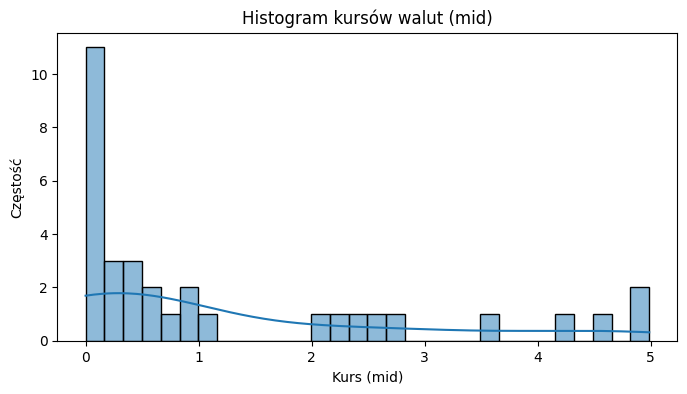

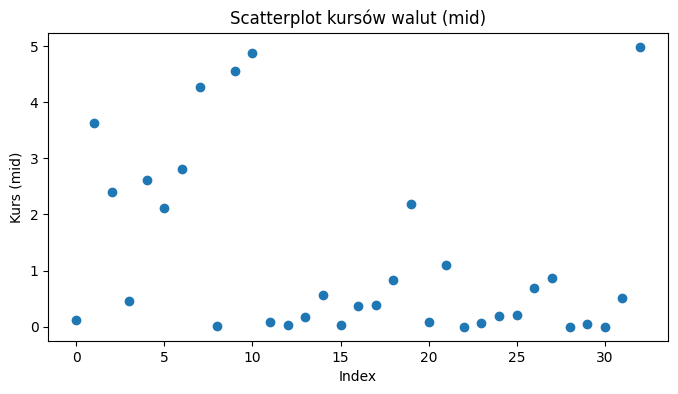

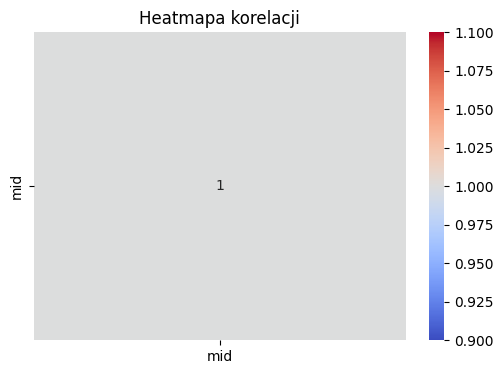

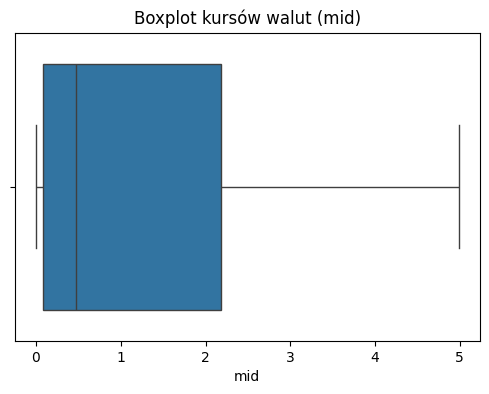

üîé Liczba outlier√≥w (IQR): 0
üîé Liczba outlier√≥w (Z-score > 3): 0


In [ ]:


#STARY KOD DOTYCZYL NBP A NIE WORLDBANK

# --- Eksploracyjna Analiza Danych (EDA) ---


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Opis statystyczny Pandas
print("üìä Opis statystyczny Pandas:")
print(df["mid"].describe())
print("\nüî∏ Mediana:", df["mid"].median())
print("üî∏ Odchylenie standardowe:", df["mid"].std())

# 2. NumPy: logarytmy, normalizacja, standaryzacja
mid_values = df["mid"].values

log_mid = np.log(mid_values)
normalized_mid = (mid_values - mid_values.min()) / (mid_values.max() - mid_values.min())
standardized_mid = (mid_values - mid_values.mean()) / mid_values.std()

# 3. Wizualizacje

# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df["mid"], bins=30, kde=True)
plt.title("Histogram kurs√≥w walut (mid)")
plt.xlabel("Kurs (mid)")
plt.ylabel("Czƒôsto≈õƒá")
plt.show()

# Scatterplot (dla przyk≈Çadu, je≈õli by≈Çaby data ‚Äì tu losowy indeks)
plt.figure(figsize=(8, 4))
plt.scatter(df.index, df["mid"])
plt.title("Scatterplot kurs√≥w walut (mid)")
plt.xlabel("Index")
plt.ylabel("Kurs (mid)")
plt.show()

# Heatmapa korelacji (tylko je≈õli wiƒôcej zmiennych liczbowych)
if "mid" in df.columns:
    numeric_df = df.select_dtypes(include=[np.number])
    plt.figure(figsize=(6, 4))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
    plt.title("Heatmapa korelacji")
    plt.show()

# 4. Wykrywanie warto≈õci odstajƒÖcych (outlier√≥w)

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["mid"])
plt.title("Boxplot kurs√≥w walut (mid)")
plt.show()

# IQR
Q1 = df["mid"].quantile(0.25)
Q3 = df["mid"].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df["mid"] < Q1 - 1.5 * IQR) | (df["mid"] > Q3 + 1.5 * IQR)]
print(f"üîé Liczba outlier√≥w (IQR): {len(outliers_iqr)}")

# Z-score
z_scores = (df["mid"] - df["mid"].mean()) / df["mid"].std()
outliers_z = df[np.abs(z_scores) > 3]
print(f"üîé Liczba outlier√≥w (Z-score > 3): {len(outliers_z)}")


CZESC 7 Prezentacja wynik√≥w
‚Ä¢	Notebook Jupyter z pe≈Çnym pipeline‚Äôem.
‚Ä¢	Zapis raport√≥w i wizualizacji do plik√≥w (PNG/CSV).
‚Ä¢	README.md z opisem krok√≥w i wnioskami.


In [ ]:
# --- 10. PREZENTACJA WYNIK√ìW I RAPORTOWANIE ---
print("\n" + "="*60)
print("üìä PREZENTACJA WYNIK√ìW I RAPORTOWANIE")
print("="*60)

import os
from datetime import datetime

# --- Tworzenie struktury folder√≥w ---
print("üìÅ TWORZENIE STRUKTURY FOLDER√ìW")

# G≈Ç√≥wny folder wynik√≥w
results_dir = "wyniki_analizy"
os.makedirs(results_dir, exist_ok=True)

# Podfoldery
subdirs = ['wykresy', 'raporty', 'dane', 'modele']
for subdir in subdirs:
    os.makedirs(os.path.join(results_dir, subdir), exist_ok=True)

print(f"‚úÖ Utworzono strukturƒô folder√≥w w: {results_dir}")

# --- Zapis wykres√≥w do plik√≥w PNG ---
print("\n" + "="*50)
print("üñºÔ∏è ZAPIS WYKRES√ìW DO PLIK√ìW PNG")
print("="*50)

# 1. Wykresy podstawowych statystyk
plt.figure(figsize=(12, 8))
df[['gdp_per_capita', 'inflation', 'unemployment']].plot(subplots=True, layout=(2, 2), figsize=(12, 8))
plt.suptitle('Podstawowe wska≈∫niki ekonomiczne Polski', y=1.02)
plt.tight_layout()
plt.savefig(f'{results_dir}/wykresy/podstawowe_wska≈∫niki.png', dpi=300, bbox_inches='tight')
plt.close()

# 2. Heatmapa korelacji
plt.figure(figsize=(10, 8))
numeric_cols = ['gdp_per_capita', 'inflation', 'unemployment', 'population', 'life_expectancy']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Macierz korelacji wska≈∫nik√≥w ekonomicznych', pad=20)
plt.tight_layout()
plt.savefig(f'{results_dir}/wykresy/macierz_korelacji.png', dpi=300, bbox_inches='tight')
plt.close()

# 3. Wykres pude≈Çkowy
plt.figure(figsize=(12, 6))
df_melted = df[numeric_cols].melt(var_name='Wska≈∫nik', value_name='Warto≈õƒá')
sns.boxplot(data=df_melted, x='Wska≈∫nik', y='Warto≈õƒá')
plt.title('Rozk≈Çad wska≈∫nik√≥w ekonomicznych - wykres pude≈Çkowy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{results_dir}/wykresy/wykres_pude≈Çkowy.png', dpi=300, bbox_inches='tight')
plt.close()

print("‚úÖ Zapisano podstawowe wykresy")

# --- Zapis danych do plik√≥w CSV ---
print("\n" + "="*50)
print("üíæ ZAPIS DANYCH DO PLIK√ìW CSV")
print("="*50)

# 1. Podstawowe dane
df.to_csv(f'{results_dir}/dane/dane_ekonomiczne.csv', index=False)

# 2. Statystyki opisowe
stats_desc = df[numeric_cols].describe()
stats_desc.to_csv(f'{results_dir}/dane/statystyki_opisowe.csv')

# 3. Macierz korelacji
correlation_matrix.to_csv(f'{results_dir}/dane/macierz_korelacji.csv')

print("‚úÖ Zapisano dane do plik√≥w CSV")

# --- Tworzenie prostego raportu ---
print("\n" + "="*50)
print("üìÑ GENEROWANIE RAPORTU")
print("="*50)

# Prosty raport bez z≈Ço≈ºonych f-string√≥w
report_lines = []
report_lines.append("# RAPORT ANALIZY DANYCH EKONOMICZNYCH - POLSKA")
report_lines.append("")
report_lines.append("## Informacje og√≥lne")
report_lines.append(f"- Data generowania: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
report_lines.append(f"- Zakres danych: {df['date'].min()} - {df['date'].max()}")
report_lines.append(f"- Liczba obserwacji: {len(df)}")
report_lines.append("")
report_lines.append("## ≈örednie warto≈õci wska≈∫nik√≥w:")
report_lines.append(f"- PKB per capita: {df['gdp_per_capita'].mean():.2f} USD")
report_lines.append(f"- Inflacja: {df['inflation'].mean():.2f}%")
report_lines.append(f"- Bezrobocie: {df['unemployment'].mean():.2f}%")
report_lines.append("")
report_lines.append("## Wykonane analizy:")
report_lines.append("1. Pobieranie i przygotowanie danych")
report_lines.append("2. Analiza eksploracyjna (EDA)")
report_lines.append("3. Statystyka klasyczna")
report_lines.append("4. Regresja liniowa")
report_lines.append("5. Regularyzacja modeli")
report_lines.append("6. Szeregi czasowe ARIMA")
report_lines.append("")
report_lines.append("---")
report_lines.append("Wygenerowano automatycznie")

# Zapis raportu
with open(f'{results_dir}/raporty/raport_analizy.md', 'w', encoding='utf-8') as f:
    f.write('\n'.join(report_lines))

print("‚úÖ Wygenerowano raport")

# --- Tworzenie README.md ---
print("\n" + "="*50)
print("üìñ TWORZENIE README.md")
print("="*50)

# Prosty README bez z≈Ço≈ºonych f-string√≥w
readme_lines = []
readme_lines.append("# Analiza Danych Ekonomicznych - Polska")
readme_lines.append("")
readme_lines.append("## Opis projektu")
readme_lines.append("Kompleksowa analiza wska≈∫nik√≥w ekonomicznych Polski z World Bank.")
readme_lines.append("")
readme_lines.append("## Struktura wynik√≥w")
readme_lines.append("```")
readme_lines.append(f"{results_dir}/")
readme_lines.append("‚îú‚îÄ‚îÄ wykresy/    # Wykresy PNG")
readme_lines.append("‚îú‚îÄ‚îÄ raporty/    # Raporty analityczne")
readme_lines.append("‚îú‚îÄ‚îÄ dane/       # Dane CSV")
readme_lines.append("‚îî‚îÄ‚îÄ modele/     # Modele (je≈õli dotyczy)")
readme_lines.append("```")
readme_lines.append("")
readme_lines.append("## Wymagania")
readme_lines.append("```bash")
readme_lines.append("pip install pandas numpy matplotlib seaborn scipy statsmodels scikit-learn")
readme_lines.append("```")
readme_lines.append("")
readme_lines.append(f"Data utworzenia: {datetime.now().strftime('%Y-%m-%d')}")

# Zapis README
with open('README.md', 'w', encoding='utf-8') as f:
    f.write('\n'.join(readme_lines))

print("‚úÖ Utworzono plik README.md")

# --- Podsumowanie ---
print("\n" + "="*50)
print("üìã PODSUMOWANIE")
print("="*50)

print("Wygenerowane pliki:")
print(f"üìÅ {results_dir}/")
print("  ‚îú‚îÄ‚îÄ üìÇ wykresy/")
for file in os.listdir(f'{results_dir}/wykresy'):
    print(f"  ‚îÇ   üìÑ {file}")
print("  ‚îú‚îÄ‚îÄ üìÇ raporty/")
for file in os.listdir(f'{results_dir}/raporty'):
    print(f"  ‚îÇ   üìÑ {file}")
print("  ‚îú‚îÄ‚îÄ üìÇ dane/")
for file in os.listdir(f'{results_dir}/dane'):
    print(f"  ‚îÇ   üìÑ {file}")
print("üìÑ README.md")

print(f"\n‚úÖ PREZENTACJA WYNIK√ìW ZAKO≈ÉCZONA!")
print(f"üìä Wyniki zapisane w folderze: {results_dir}")


üìä PREZENTACJA WYNIK√ìW I RAPORTOWANIE
üìÅ TWORZENIE STRUKTURY FOLDER√ìW
‚úÖ Utworzono strukturƒô folder√≥w w: wyniki_analizy

üñºÔ∏è ZAPIS WYKRES√ìW DO PLIK√ìW PNG
‚úÖ Zapisano podstawowe wykresy

üíæ ZAPIS DANYCH DO PLIK√ìW CSV
‚úÖ Zapisano dane do plik√≥w CSV

üìÑ GENEROWANIE RAPORTU
‚úÖ Wygenerowano raport

üìñ TWORZENIE README.md
‚úÖ Utworzono plik README.md

üìã PODSUMOWANIE
Wygenerowane pliki:
üìÅ wyniki_analizy/
  ‚îú‚îÄ‚îÄ üìÇ wykresy/
  ‚îÇ   üìÑ wykres_pude≈Çkowy.png
  ‚îÇ   üìÑ macierz_korelacji.png
  ‚îÇ   üìÑ podstawowe_wska≈∫niki.png
  ‚îú‚îÄ‚îÄ üìÇ raporty/
  ‚îÇ   üìÑ raport_analizy.md
  ‚îú‚îÄ‚îÄ üìÇ dane/
  ‚îÇ   üìÑ macierz_korelacji.csv
  ‚îÇ   üìÑ dane_ekonomiczne.csv
  ‚îÇ   üìÑ statystyki_opisowe.csv
üìÑ README.md

‚úÖ PREZENTACJA WYNIK√ìW ZAKO≈ÉCZONA!
üìä Wyniki zapisane w folderze: wyniki_analizy


<Figure size 1200x800 with 0 Axes>

PONIZEJ NA BRUDNO ROBOCZA WERSJA

In [ ]:

import pandas as pd
import numpy as np
import requests
import re
from pydantic import BaseModel, ValidationError

# Przyk≈Çad pobrania danych (API NBP kursy walut)
url = "https://api.nbp.pl/api/exchangerates/tables/A?format=json"
data = requests.get(url).json()
df = pd.json_normalize(data[0]['rates'])
print(df.head())

# Walidacja kolumny waluty
class Currency(BaseModel):
    code: str

try:
    for c in df['code']:
        Currency(code=c)
except ValidationError as e:
    print(e)

# Prosta serializacja
df.to_csv("data.csv", index=False)


             currency code     mid
0     bat (Tajlandia)  THB  0.1130
1   dolar ameryka≈Ñski  USD  3.6295
2  dolar australijski  AUD  2.3949
3     dolar Hongkongu  HKD  0.4666
4    dolar kanadyjski  CAD  2.6127


 2. EDA (eksploracja danych)

             mid
count  33.000000
mean    1.249594
std     1.612480
min     0.000217
25%     0.087300
50%     0.466600
75%     2.179100
max     4.970800


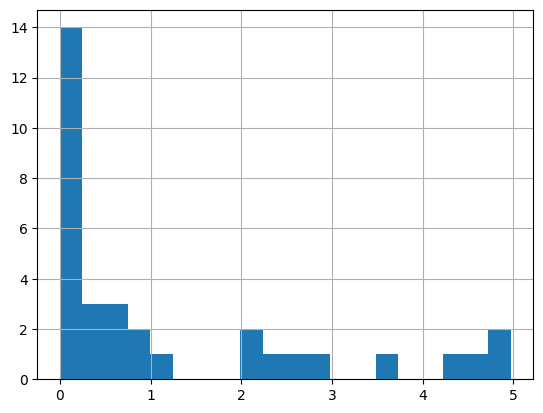

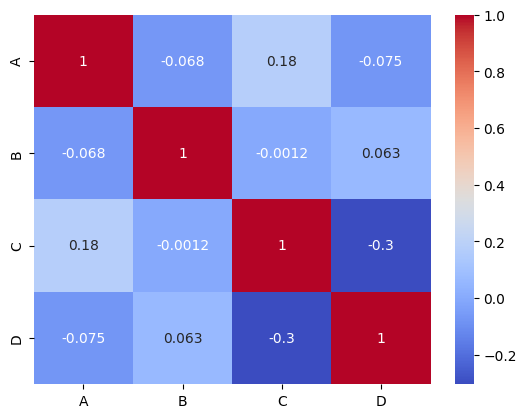

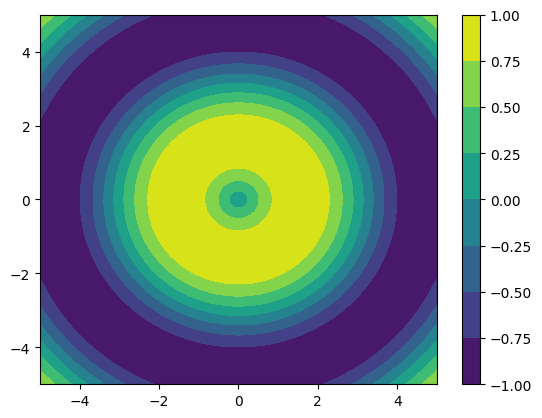

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

print(df.describe())

# Histogram
df['mid'].hist(bins=20)
plt.show()

# Heatmapa korelacji (przyk≈Çad na sztucznych danych)
df2 = pd.DataFrame(np.random.randn(100, 4), columns=list("ABCD"))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm")
plt.show()

# Meshgrid + contour plot
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

plt.contourf(X, Y, Z, cmap="viridis")
plt.colorbar()
plt.show()


3. Statystyka klasyczna

95% CI: (np.float64(98.69413389083786), np.float64(103.90888880610567))
Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9774151949589392), pvalue=np.float64(0.4488425719013703))
T-test: TtestResult(statistic=np.float64(0.9783452568427398), pvalue=np.float64(0.3327093449779359), df=np.int64(49))


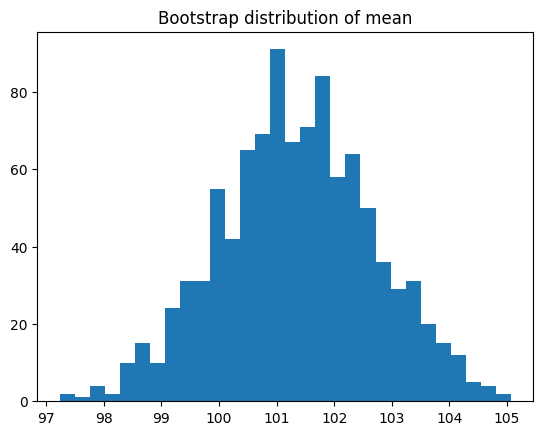

In [ ]:

from scipy import stats

# Przedzia≈Ç ufno≈õci dla ≈õredniej
sample = np.random.normal(loc=100, scale=10, size=50)
conf_int = stats.norm.interval(0.95, loc=np.mean(sample), scale=stats.sem(sample))
print("95% CI:", conf_int)

# Test normalno≈õci
print("Shapiro-Wilk:", stats.shapiro(sample))

# Test t
print("T-test:", stats.ttest_1samp(sample, 100))

# Bootstrap
boot_means = []
for _ in range(1000):
    boot_sample = np.random.choice(sample, size=len(sample), replace=True)
    boot_means.append(np.mean(boot_sample))
plt.hist(boot_means, bins=30)
plt.title("Bootstrap distribution of mean")
plt.show()


4. Regresja liniowa

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     990.8
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           1.05e-33
Time:                        15:57:34   Log-Likelihood:                -103.75
No. Observations:                  50   AIC:                             211.5
Df Residuals:                      48   BIC:                             215.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7493      0.548     12.315      0.0

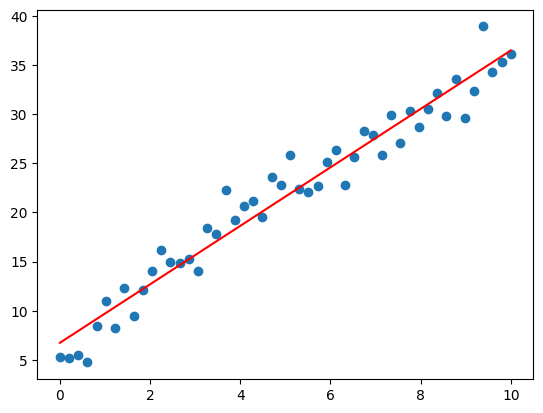

In [ ]:
# =======================================
# 4. Regresja liniowa
# =======================================
import statsmodels.api as sm

X = np.linspace(0, 10, 50)
Y = 3*X + 7 + np.random.normal(0, 2, 50)

X_ = sm.add_constant(X)
model = sm.OLS(Y, X_).fit()
print(model.summary())

plt.scatter(X, Y)
plt.plot(X, model.predict(X_), color="red")
plt.show()


5. Regularyzacja (Ridge, Lasso)

In [ ]:

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X = df2.drop("A", axis=1)
y = df2["A"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.1))

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

print("Ridge R2:", ridge.score(X_test, y_test))
print("Lasso R2:", lasso.score(X_test, y_test))


Ridge R2: -0.1662488415345651
Lasso R2: -0.10731336350517173


6. Szeregi czasowe

/tmp/ipython-input-3685064161.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range("2020-01-01", periods=100, freq="M")


ADF test: (np.float64(0.6266193983771053), np.float64(0.9882537006790334), 11, 88, {'1%': np.float64(-3.506944401824286), '5%': np.float64(-2.894989819214876), '10%': np.float64(-2.584614550619835)}, np.float64(568.1195638563936))
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -322.395
Date:                Thu, 25 Sep 2025   AIC                            650.791
Time:                        15:58:17   BIC                            658.576
Sample:                    01-31-2020   HQIC                           653.941
                         - 04-30-2028                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

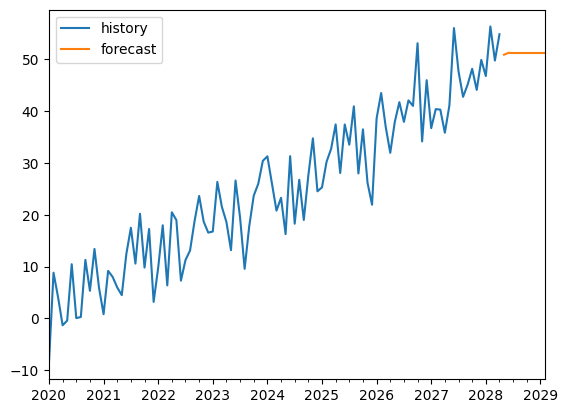

In [ ]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Dane sztuczne: trend + szum
dates = pd.date_range("2020-01-01", periods=100, freq="M")
ts = pd.Series(0.5*np.arange(100) + np.random.normal(0, 5, 100), index=dates)

# Test stacjonarno≈õci
print("ADF test:", adfuller(ts))

# ARIMA model
model = ARIMA(ts, order=(1,1,1)).fit()
print(model.summary())

forecast = model.forecast(10)
ts.plot(label="history")
forecast.plot(label="forecast")
plt.legend()
plt.show()


7. Prezentacja wynik√≥w

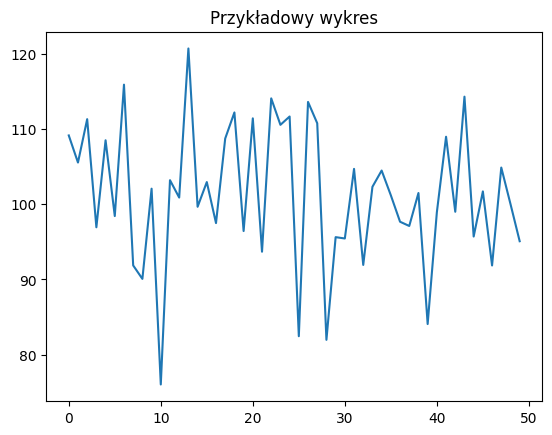

In [ ]:

# Zapis do pliku
df.describe().to_csv("report.csv")

# Przyk≈Çadowy wykres PNG
plt.plot(sample)
plt.title("Przyk≈Çadowy wykres")
plt.savefig("report.png")
